<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
plt.style.use("ggplot")

# <font color = blue> EDA Case Study </font>


##  Task 1: Reading the data

 ### Read the Application Data.
 Reading the application data file provided and storing it in a dataframe `appl_df`.

In [3]:
appl_df_master = pd.read_csv("application_data.csv")

- ###  Inspect the Dataframe

Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
#Creating a copy of the dataframe
appl_df =appl_df_master.copy()

In [5]:
# see the information
appl_df.shape 


(307511, 122)

In [6]:
appl_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
# Checking statistical values for all columns
appl_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [8]:
#Since XNA is not counted as null value we replace all the 'XNA' values in the data frame to np.nan
#Trying to replace XNA with NA for the entire dataframe
appl_df=appl_df.replace('XNA',np.nan)


In [9]:
appl_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307507,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [10]:
#Checking for missing value percentage
appl_df.isnull().sum()/len(appl_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.001301
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

###### finding columns with missing values greater than 50 percent


In [11]:
#greater_than_50pc = missing_values[missing_values >=50]
null_value_columns = appl_df.isnull().sum() >(.5*len(appl_df))
null_value_columns

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool

In [12]:
len(null_value_columns[null_value_columns])

41

41 columns are having 50 percent or more null value. These columns will be dropped.

In [13]:
#displaying the null value columns
null_value_columns[null_value_columns].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [14]:
#Seperating non-null value columns
non_null_value_columns = null_value_columns[~null_value_columns]
len(non_null_value_columns)


81

In [15]:
#using the index gives the column names with non_null_value columns
#this is filtered from the dataframe
# Data now reduces to fewer columns
# The data frame 'appl_filtered_df' will be used as a refernce from now on as the application data frame
appl_filtered_df = appl_df[non_null_value_columns.index].copy()
appl_filtered_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Finding coilumns with less than 13 percentage null values
null_value_columns_less_than_13 = appl_filtered_df.isnull().sum() < (.13*len(appl_filtered_df))

In [17]:
null_value_columns_less_than_13[null_value_columns_less_than_13].index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_C

In [18]:
len(null_value_columns_less_than_13[null_value_columns_less_than_13])

64

In [19]:
null_value_columns_less_than_13[null_value_columns_less_than_13]

SK_ID_CURR            True
TARGET                True
NAME_CONTRACT_TYPE    True
CODE_GENDER           True
FLAG_OWN_CAR          True
                      ... 
FLAG_DOCUMENT_17      True
FLAG_DOCUMENT_18      True
FLAG_DOCUMENT_19      True
FLAG_DOCUMENT_20      True
FLAG_DOCUMENT_21      True
Length: 64, dtype: bool

##### CODE_GENDER NULL Value Treatment

In [20]:
#Sanity Check
appl_filtered_df.CODE_GENDER.unique()

array(['M', 'F', nan], dtype=object)

In [21]:
appl_filtered_df.CODE_GENDER.isnull().sum()

4

###### Suggestion to handle null value
Delete the records for gender 'null' because the count is very small for the number of null values.
Suggested method appl_filtered_df=appl_filtered_df[appl_filtered_df.CODE_GENDER.notnull()]

##### AMT_ANNUITY Null Value Treatment

In [22]:
appl_filtered_df.AMT_ANNUITY.isnull().sum()

12

In [23]:
appl_filtered_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

###### Suggestion to handle null value
We can remove the records with null value for amount annuity as the number of records compared to the number of records available is very small.

##### AMT_GOODS_PRICE Null Value Treatment

In [24]:
appl_filtered_df.AMT_GOODS_PRICE.isnull().sum()

278

In [25]:
appl_filtered_df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

###### Suggestion to handle null value
We can impute the value for these record with null value for amount goods price by the median value. This approach was chosen as there are considerable number of records.

##### EXT_SOURCE_2 Null Value Treatment

In [26]:
appl_filtered_df.EXT_SOURCE_2.isnull().sum()

660

###### Suggestion to handle null value
We can leave them as null values as these are values got from external companies that have derived a credit score for the customer. If they are null it means the values were not available. 

##### CNT_FAM_MEMBERS Null Value Treatment

In [27]:
appl_filtered_df.CNT_FAM_MEMBERS.isnull().sum()

2

###### Suggestion to handle null value
These records with null values can be dropped as the number of available records is very high comapred to these records.

##### ORGANIZATION_TYPE Null Value Treatment

In [28]:
appl_filtered_df.ORGANIZATION_TYPE.isnull().sum()

55374

###### Suggestion to handle null value
We can create a new category called 'Unknown' and impute the values for this column.

#### Data Quality Check 

In [29]:
appl_filtered_df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
201994,334149,0,Cash loans,F,N,Y,0,145350.0,1061599.5,31171.5,...,0,0,0,0,0.0,0.0,0.0,7.0,0.0,4.0
157250,282279,0,Revolving loans,F,N,Y,0,85500.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
136733,258585,0,Revolving loans,F,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
21932,125550,0,Cash loans,M,Y,N,2,157500.0,835380.0,32818.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
117744,236530,0,Cash loans,M,N,Y,1,76500.0,549882.0,17739.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


####  Data Quality Check for changing the data type 

##### Data Quality Check for  DAYS_BIRTH                    

In [30]:
appl_filtered_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307507 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [31]:
appl_filtered_df.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

###### Observation
This column describes the days since birth. The values are negative and in the form of count of days. It will be converted to absolute value and in terms of years.

In [32]:
appl_filtered_df['Age'] =abs(appl_filtered_df.DAYS_BIRTH)//365

In [33]:
appl_filtered_df.Age.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

##### Data Quality Check for  DAYS_EMPLOYED            

In [34]:
appl_filtered_df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

###### Observation
This column gives the days since employed. The values are negative and in the form of count of days. It will be converted to absolute value and in terms of years.

In [35]:
appl_filtered_df['Years_Employment'] =abs(appl_filtered_df.DAYS_EMPLOYED)//365

In [36]:
appl_filtered_df['Years_Employment'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: Years_Employment, dtype: float64

####  Data Check for outliers in numeric columns 

##### Data Quality Check for  Years_Employment            

In [37]:
appl_filtered_df.Years_Employment.describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: Years_Employment, dtype: float64

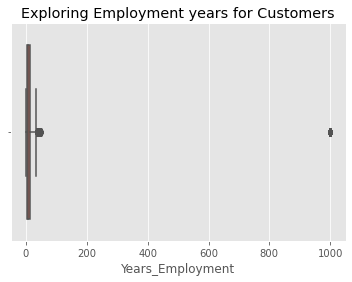

In [38]:
sns.boxplot(appl_filtered_df.Years_Employment)
plt.title("Exploring Employment years for Customers")
plt.show()

###### Observation
As observed above the max value of Employment is 1000 years. To remove the outlier we can discard all values above 90 percentile.

appl_filtered_df = appl_filtered_df[appl_filtered_df.Years_Employment < appl_filtered_df.Years_Employment.quantile(.90)]

##### Data Quality Check for  DAYS_REGISTRATION            

In [39]:
appl_filtered_df.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

###### Observation
This column gives the days before which the application client changed his registration. The values are negative and in the form of count of days. It will be converted to absolute value and in terms of years.

In [40]:
appl_filtered_df['Years_REGISTRATION'] =abs(appl_filtered_df.DAYS_REGISTRATION)//365

In [41]:
appl_filtered_df['Years_REGISTRATION'].describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: Years_REGISTRATION, dtype: float64

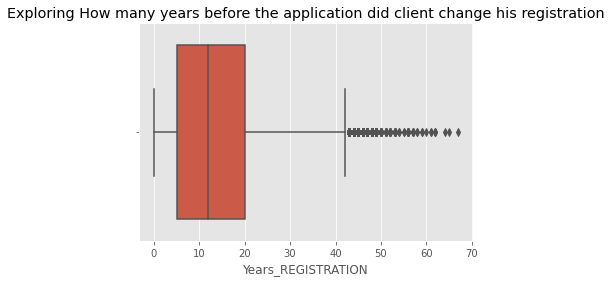

In [42]:
sns.boxplot(appl_filtered_df.Years_REGISTRATION)
plt.title("Exploring How many years before the application did client change his registration")
plt.show()

###### Observation
There are a few outliers in this column with median of just above 10 years. 50% of data is between 5 to 20 years before the application client changed his registration

##### Data Quality Check for  DAYS_ID_PUBLISH            

In [43]:
appl_filtered_df.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

###### Observation
This column gives the number of days before the application the client changed the identity document with which he applied for the loan. The values are negative and in the form of count of days. It will be converted to absolute value and in terms of years.

In [44]:
appl_filtered_df['Years_publish'] =abs(appl_filtered_df.DAYS_ID_PUBLISH)//365

In [45]:
appl_filtered_df['Years_publish'].describe()

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: Years_publish, dtype: float64

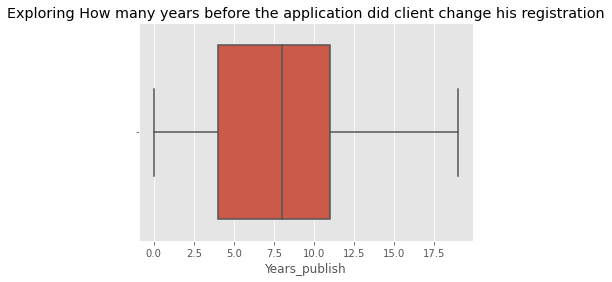

In [46]:
sns.boxplot(appl_filtered_df.Years_publish)
plt.title("Exploring How many years before the application did client change his registration")
plt.show()

###### Observation
The data has a median of just above 7.5 years. 50% of data lies approximately between 4 to 11 years before the application client changed the identity document with which he applied for the loan.

##### Data Quality Check for  AMT_INCOME_TOTAL            

In [47]:
appl_filtered_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

###### Observation
The max value is very large comapared to the 75 perentile. To see the outlier a box plot is plotted below.

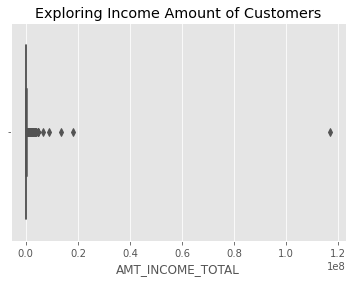

In [48]:
sns.boxplot(appl_filtered_df.AMT_INCOME_TOTAL)
plt.title("Exploring Income Amount of Customers")
plt.show();

###### Observation
As observed above the max value of amount of income is an outlier. To remove the outlier we can discard all values above 90 percentile.

appl_filtered_df = appl_filtered_df[appl_filtered_df.AMT_INCOME_TOTAL < appl_filtered_df.AMT_INCOME_TOTAL.quantile(.90)]

##### Data Quality Check for  AMT_ANNUITY            

In [49]:
appl_filtered_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

###### Observation
The max value is very large comapared to the 75 perentile. To see the outlier a box plot is plotted below.

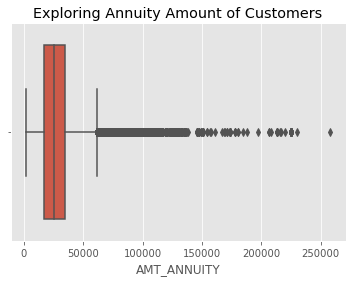

In [50]:
sns.boxplot(appl_filtered_df.AMT_ANNUITY)
plt.title("Exploring Annuity Amount of Customers")
plt.show();

###### Observation
As observed above there are outliers for the amount of Annuity. To remove the outlier we can discard all values above 90 percentile. 

appl_filtered_df = appl_filtered_df[appl_filtered_df.AMT_ANNUITY < appl_filtered_df.AMT_ANNUITY.quantile(.90)]

##### Data Quality Check for  AMT_CREDIT            

In [51]:
appl_filtered_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

###### Observation
The outliers are not very evident from the statistical parameters. To see the outlier a box plot is plotted below.

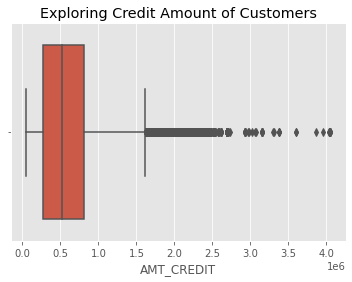

In [52]:
sns.boxplot(appl_filtered_df.AMT_CREDIT)
plt.title("Exploring Credit Amount of Customers")
plt.show();

###### Observation
As observed above there are outliers for the amount of Annuity. To remove the outlier we can discard all values above 90 percentile.

appl_filtered_df = appl_filtered_df[appl_filtered_df.AMT_CREDIT < appl_filtered_df.AMT_CREDIT.quantile(.90)]

##### Data Quality Check for  AMT_GOODS_PRICE            

In [53]:
appl_filtered_df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

###### Observation
The outliers are not very evident from the statistical parameters. To see the outlier a box plot is plotted below.

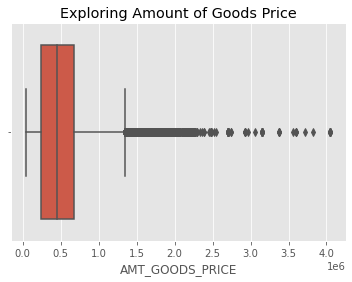

In [54]:
sns.boxplot(appl_filtered_df.AMT_GOODS_PRICE)
plt.title("Exploring Amount of Goods Price")
plt.show();

###### Observation
As observed above there are outliers for the amount of Goods Price. To remove the outlier we can discard all values above 90 percentile.

appl_filtered_df = appl_filtered_df[appl_filtered_df.AMT_GOODS_PRICE < appl_filtered_df.AMT_GOODS_PRICE.quantile(.90)]

##### Data Quality Check for  AMT_GOODS_PRICE            

In [55]:
appl_filtered_df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

###### Observation
The outliers are not very evident from the statistical parameters. To see the outlier a box plot is plotted below.

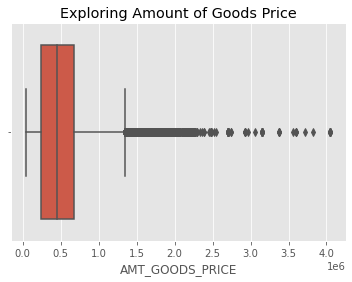

In [56]:
sns.boxplot(appl_filtered_df.AMT_GOODS_PRICE)
plt.title("Exploring Amount of Goods Price")
plt.show();

###### Observation
As observed above there are outliers for the amount of Amount of Goods Price. To remove the outlier we can discard all values above 90 percentile.

appl_filtered_df = appl_filtered_df[appl_filtered_df.AMT_GOODS_PRICE < appl_filtered_df.AMT_GOODS_PRICE.quantile(.90)]

####  Data Binning for continuous variables

##### Age Column
Binning the age of customers into groups as shown below.

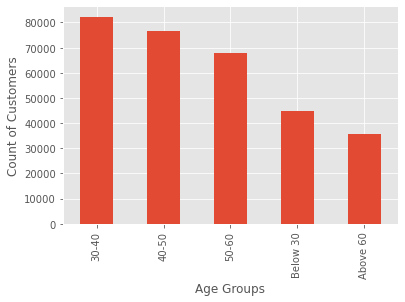

In [57]:
pd.cut(appl_filtered_df['Age'],bins=5,labels=['Below 30','30-40','40-50','50-60','Above 60'
                                         ]).value_counts().plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel("Count of Customers")

plt.show()

###### Observation
The maximum number of customers are between the age group of 30 to 40 followed closely by the age group of 40 to 50.

##### Years of Employment Column
Binning the employment years of customers into groups as shown below.

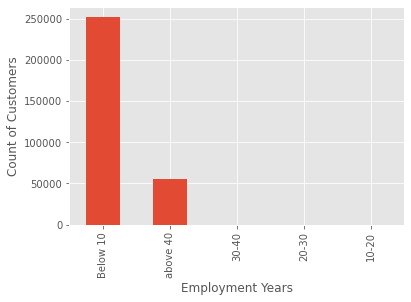

In [58]:
pd.cut(appl_filtered_df.Years_Employment,bins=5,labels=['Below 10','10-20','20-30','30-40','above 40'
                                         ]).value_counts().plot(kind='bar')
plt.xlabel('Employment Years')
plt.ylabel("Count of Customers")

plt.show()

###### Observation
The maximum number of customers are below 10 years of employment.

#### Checking for data imbalance percentage

In [59]:
# two more data frames namely has_defaulters_df with Target variable as 1 and non_defaulters_df with Target variable as 0 

has_defaulters_df = appl_filtered_df[appl_filtered_df['TARGET'] == 1]
non_defaulters_df =appl_filtered_df[appl_filtered_df['TARGET'] == 0]

In [60]:
# Taking ratio of number of defaulters record to non defaulters records
round(len(has_defaulters_df)/len(non_defaulters_df),3)

0.088

###### Observation 
There is a data imbalance in the ratio of number of records for defaulters  to non defaulters records. The ratio is less than 50 %.
1. It can be inferred that there are less defaulters as customers which is a good for the financial institution.
2. The data since it is less for defaulters it becomes difficult to predict the behaviour of the defaulters.

#### Univariate Analysis for categorical variable

##### CODE_GENDER

In [61]:
appl_filtered_df.CODE_GENDER.unique()

array(['M', 'F', nan], dtype=object)

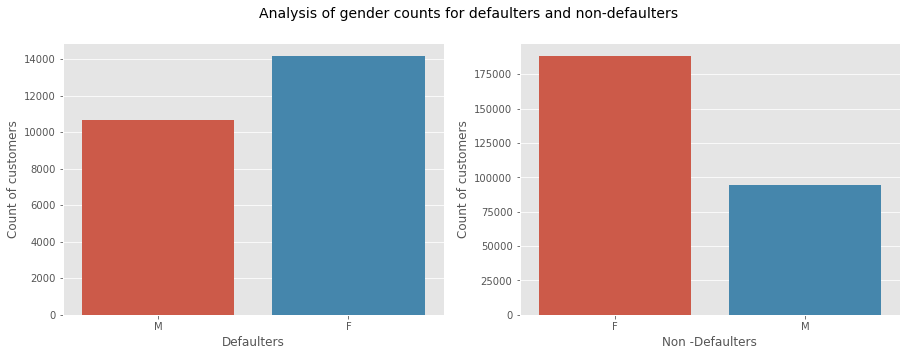

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='CODE_GENDER', data=has_defaulters_df)
plt.suptitle('Analysis of gender counts for defaulters and non-defaulters', fontsize=14)
plt.xlabel('Defaulters')
plt.ylabel('Count of customers')
plt.subplot(1, 2, 2)
sns.countplot(x='CODE_GENDER', data=non_defaulters_df)

plt.xlabel('Non -Defaulters')
plt.ylabel('Count of customers')
plt.show()


######  Observation 
Female customers are more than male customers for the defaulter and non defaulter segment .

##### NAME_EDUCATION_TYPE             

In [63]:
appl_filtered_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

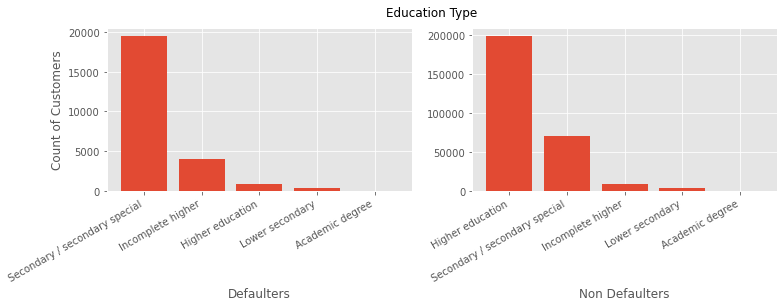

In [64]:
#finding the Education Type and defaulters corelation
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2,  figsize=(12,3), )

ax1.bar(has_defaulters_df.NAME_EDUCATION_TYPE.unique(), has_defaulters_df.NAME_EDUCATION_TYPE.value_counts())
ax2.bar( non_defaulters_df.NAME_EDUCATION_TYPE.unique(), non_defaulters_df.NAME_EDUCATION_TYPE.value_counts())
fig.suptitle('Education Type')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.NAME_EDUCATION_TYPE.unique(),rotation=30, ha='right')
ax2.set_xticklabels(non_defaulters_df.NAME_EDUCATION_TYPE.unique(),rotation=30, ha='right');

######  Observation 
Maximum customers who default have education of secondary level. Non defaulters have a higher education. A data imbalance is seen in this column

##### NAME_INCOME_TYPE             

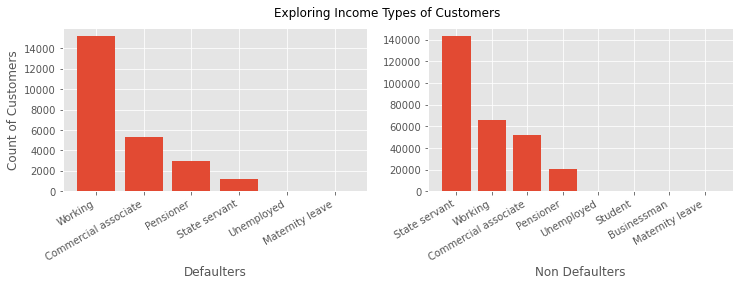

In [65]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2,  figsize=(12,3), )

ax1.bar(has_defaulters_df.NAME_INCOME_TYPE.unique(), has_defaulters_df.NAME_INCOME_TYPE.value_counts())
ax2.bar( non_defaulters_df.NAME_INCOME_TYPE.unique(), non_defaulters_df.NAME_INCOME_TYPE.value_counts())
fig.suptitle('Exploring Income Types of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.NAME_INCOME_TYPE.unique(),rotation=30, ha='right')
ax2.set_xticklabels(non_defaulters_df.NAME_INCOME_TYPE.unique(),rotation=30, ha='right');

######  Observation 
Most of the customers who default are working class. Non defaulters belong to State servant category. A data imbalance is seen in this column.

##### NAME_CONTRACT_TYPE             

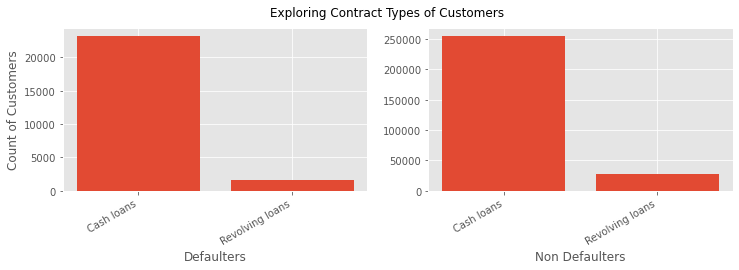

In [66]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), )

ax1.bar(has_defaulters_df.NAME_CONTRACT_TYPE.unique(), has_defaulters_df.NAME_CONTRACT_TYPE.value_counts())
ax2.bar( non_defaulters_df.NAME_CONTRACT_TYPE.unique(), non_defaulters_df.NAME_CONTRACT_TYPE.value_counts())
fig.suptitle('Exploring Contract Types of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.NAME_CONTRACT_TYPE.unique(),rotation=30, ha='right')
ax2.set_xticklabels(non_defaulters_df.NAME_CONTRACT_TYPE.unique(),rotation=30, ha='right');

######  Observation 
Most of the customers who default have taken cash loans. Maximum loans taken by Non defaulters are also cash loans. A data imbalance is seen in this column.

##### NAME_FAMILY_STATUS             

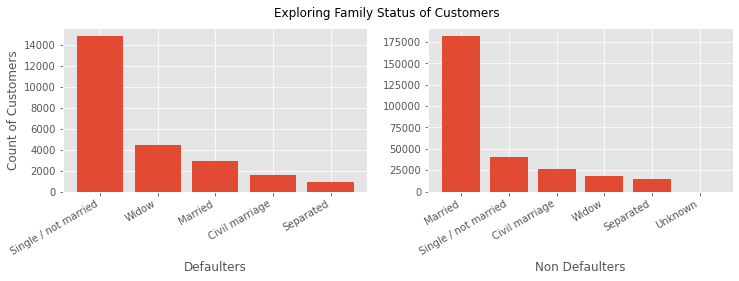

In [67]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), )

ax1.bar(has_defaulters_df.NAME_FAMILY_STATUS.unique(), has_defaulters_df.NAME_FAMILY_STATUS.value_counts())
ax2.bar( non_defaulters_df.NAME_FAMILY_STATUS.unique(), non_defaulters_df.NAME_FAMILY_STATUS.value_counts())
fig.suptitle('Exploring Family Status of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.NAME_FAMILY_STATUS.unique(),rotation=30, ha='right')
ax2.set_xticklabels(non_defaulters_df.NAME_FAMILY_STATUS.unique(),rotation=30, ha='right');

######  Observation 
Single or not married people tend to default more. Married people are mostly Non defaulters.

##### NAME_HOUSING_TYPE             

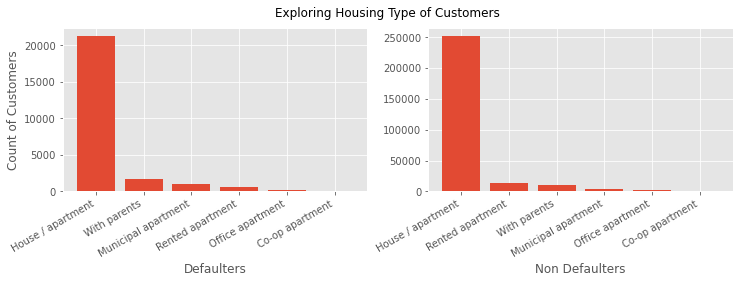

In [68]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2,  figsize=(12,3), )

ax1.bar(has_defaulters_df.NAME_HOUSING_TYPE.unique(), has_defaulters_df.NAME_HOUSING_TYPE.value_counts())
ax2.bar( non_defaulters_df.NAME_HOUSING_TYPE.unique(), non_defaulters_df.NAME_HOUSING_TYPE.value_counts())
fig.suptitle('Exploring Housing Type of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.NAME_HOUSING_TYPE.unique(),rotation=30, ha='right')
ax2.set_xticklabels(non_defaulters_df.NAME_HOUSING_TYPE.unique(),rotation=30, ha='right');

######  Observation 
There is no clear segmentation for this column.

##### FLAG_OWN_CAR             

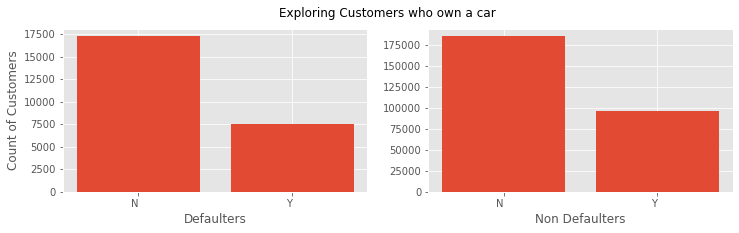

In [69]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2,  figsize=(12,3), )

ax1.bar(has_defaulters_df.FLAG_OWN_CAR.unique(), has_defaulters_df.FLAG_OWN_CAR.value_counts())
ax2.bar( non_defaulters_df.FLAG_OWN_CAR.unique(), non_defaulters_df.FLAG_OWN_CAR.value_counts())
fig.suptitle('Exploring Customers who own a car')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.FLAG_OWN_CAR.unique(), ha='right')
ax2.set_xticklabels(non_defaulters_df.FLAG_OWN_CAR.unique(), ha='right');

######  Observation 
There is no clear segmentation for this column.

##### FLAG_OWN_REALTY             

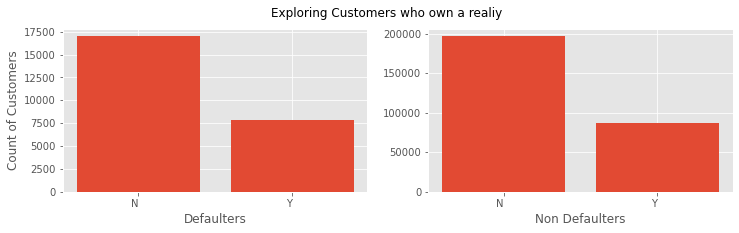

In [70]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2,  figsize=(12,3), )

ax1.bar(has_defaulters_df.FLAG_OWN_REALTY.unique(), has_defaulters_df.FLAG_OWN_REALTY.value_counts())
ax2.bar( non_defaulters_df.FLAG_OWN_REALTY.unique(), non_defaulters_df.FLAG_OWN_REALTY.value_counts())
fig.suptitle('Exploring Customers who own a realiy')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(has_defaulters_df.FLAG_OWN_CAR.unique(), ha='right')
ax2.set_xticklabels(non_defaulters_df.FLAG_OWN_CAR.unique(), ha='right');

######  Observation 
There is no clear distinguishing pattern for defaulters for this column.

##### FLAG_DOCUMENT

Checking for flags that denote if documents were submitted or not

In [71]:
# Check if the document flag count is high for defaulters
flag_doc_df_score =has_defaulters_df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].sum()
flag_doc_non_df_score =non_defaulters_df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].sum()


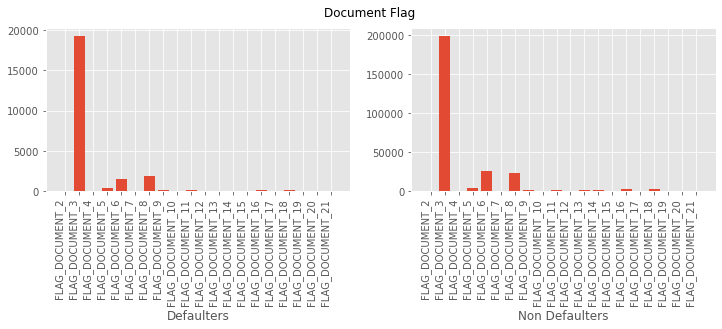

In [72]:
#finding the Document Flag and defaulters corelation
fig,ax = plt.subplots(ncols=2,  figsize=(12,3))
plt.xticks(rotation=90)
defaulters = ax[0].bar(flag_doc_df_score.index, flag_doc_df_score)
non_defaulters = ax[1].bar(flag_doc_non_df_score.index, flag_doc_non_df_score)
fig.suptitle('Document Flag')

ax[0].set(xlabel='Defaulters')

ax[1].set(xlabel='Non Defaulters')
ax[0].set_xticklabels(flag_doc_df_score.index,rotation=90, ha='right')
ax[1].set_xticklabels(flag_doc_non_df_score.index,rotation=90, ha='right');

###### Observation
There is no distinguishing pattern for the defaulters.

#####   ADDRESS RELATED


REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY


In [73]:
#Trying to check if address to contact is an issue with defaulters
address_df_score = has_defaulters_df[['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION' ,'REG_CITY_NOT_LIVE_CITY' ,'REG_CITY_NOT_WORK_CITY' ,'LIVE_CITY_NOT_WORK_CITY']].sum()
adress_non_df_score = non_defaulters_df[['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION' ,'REG_CITY_NOT_LIVE_CITY' ,'REG_CITY_NOT_WORK_CITY' ,'LIVE_CITY_NOT_WORK_CITY']].sum()



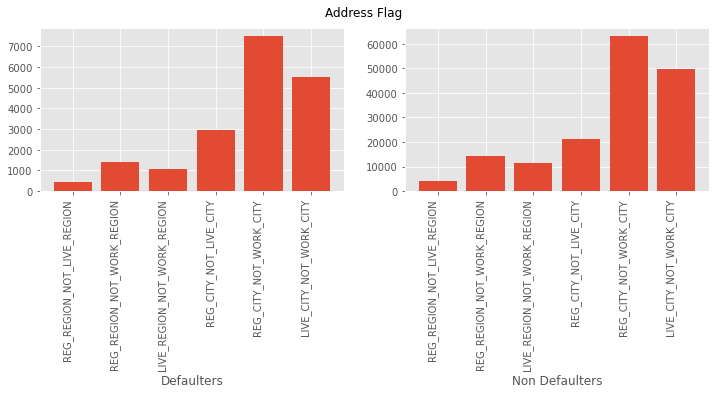

In [74]:
#finding the Address Flag and defaulters corelation
fig,ax = plt.subplots(ncols=2,  figsize=(12,3))
plt.xticks(rotation=90)
defaulters = ax[0].bar(address_df_score.index, address_df_score)
non_defaulters = ax[1].bar(adress_non_df_score.index, adress_non_df_score)

fig.suptitle('Address Flag')

ax[0].set(xlabel='Defaulters')
ax[1].set(xlabel='Non Defaulters')

ax[0].set_xticklabels(address_df_score.index,rotation=90, ha='right')
ax[1].set_xticklabels(adress_non_df_score.index,rotation=90, ha='right');

###### Observation
The address Flag if client's permanent address does not match contact address is slightly high in defaulters.

#### Univariate Analysis for continuous variable

##### Age            

In [75]:
defaulters_age = pd.cut(has_defaulters_df['Age'],bins=5,labels=['Below 30','30-40','40-50','50-60','Above 60'
                                         ])
non_defaulters_age = pd.cut(non_defaulters_df['Age'],bins=5,labels=['Below 30','30-40','40-50','50-60','Above 60'
                                         ])

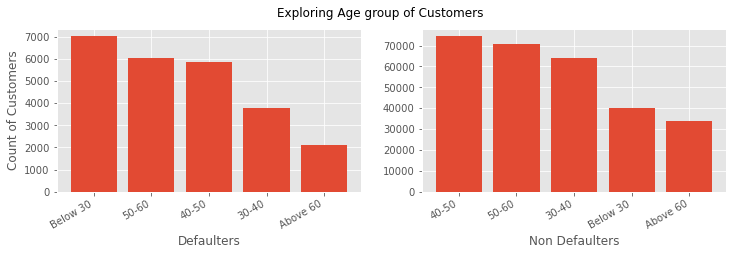

In [76]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), )

ax1.bar(defaulters_age.unique(), defaulters_age.value_counts())
ax2.bar( non_defaulters_age.unique(), non_defaulters_age.value_counts())
fig.suptitle('Exploring Age group of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
ax1.set_xticklabels(defaulters_age.unique(),rotation=30, ha='right')
ax2.set_xticklabels(non_defaulters_age.unique(),rotation=30, ha='right');

######  Observation 
Most of the customers who default are below 30 . Most of the non- defaulters are between 40 to 50 years of age. There is a dat imbalance seen here for Non defaulters and defaulters.

##### Years of Employment             

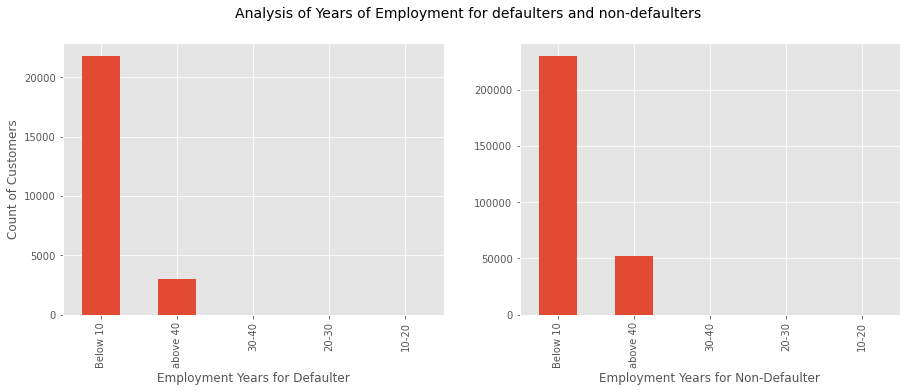

In [77]:
plt.figure(figsize=(15,5))
plt.suptitle('Analysis of Years of Employment for defaulters and non-defaulters', fontsize=14)

plt.subplot(1, 2, 1)
pd.cut(has_defaulters_df.Years_Employment,bins=5,labels=['Below 10','10-20','20-30','30-40','above 40'
                                         ]).value_counts().plot(kind='bar')
plt.xlabel('Employment Years for Defaulter')
plt.ylabel("Count of Customers")
plt.subplot(1, 2, 2)
pd.cut(non_defaulters_df.Years_Employment,bins=5,labels=['Below 10','10-20','20-30','30-40','above 40'
                                         ]).value_counts().plot(kind='bar')
plt.xlabel('Employment Years for Non-Defaulter')
plt.show()

######  Observation 
Defaulter rate is less in the group of customers with employment years gretaer than 40.

##### AMT_INCOME_TOTAL            

In [78]:
has_defaulters_df.AMT_INCOME_TOTAL.describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [79]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000]

slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

has_defaulters_df['AMT_INCOME']=pd.cut(has_defaulters_df['AMT_INCOME_TOTAL'],bins=bins,labels=slots)
non_defaulters_df['AMT_INCOME']=pd.cut(non_defaulters_df['AMT_INCOME_TOTAL'],bins=bins,labels=slots)



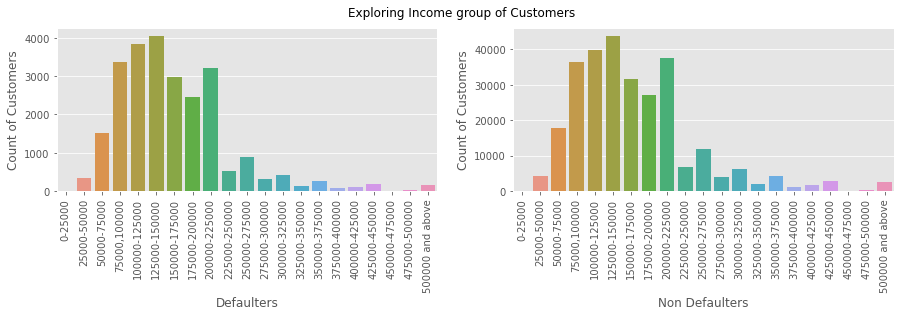

In [80]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.AMT_INCOME) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.AMT_INCOME) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring Income group of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
No significant pattern for defaulters.

##### AMT_CREDIT            

In [81]:
has_defaulters_df.AMT_CREDIT.describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

In [82]:
bins = np.arange(0,5000000,500000)
bins

array([      0,  500000, 1000000, 1500000, 2000000, 2500000, 3000000,
       3500000, 4000000, 4500000])

In [83]:
has_defaulters_df['Credit_bin']=pd.cut(has_defaulters_df['AMT_CREDIT'],bins=bins)
non_defaulters_df['Credit_bin']=pd.cut(non_defaulters_df['AMT_CREDIT'],bins=bins)

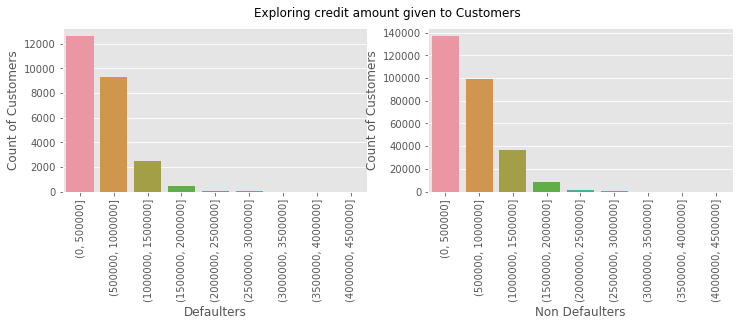

In [84]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.Credit_bin) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.Credit_bin) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring credit amount given to Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
No significant pattern for defaulters.

##### AMT_ANNUITY            

In [85]:
has_defaulters_df.AMT_ANNUITY.describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

In [86]:
bins = np.arange(0,150000,10000)
bins

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000])

In [87]:
has_defaulters_df['Annuity_bin']=pd.cut(has_defaulters_df['AMT_ANNUITY'],bins=bins)
non_defaulters_df['Annuity_bin']=pd.cut(non_defaulters_df['AMT_ANNUITY'],bins=bins)

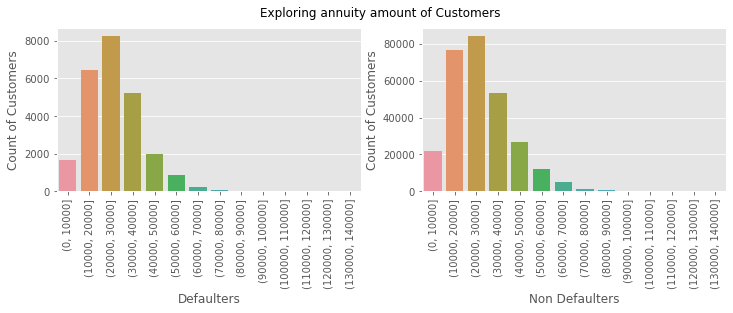

In [88]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.Annuity_bin) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.Annuity_bin) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring annuity amount of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
No significant pattern for defaulters.

##### AMT_GOODS_PRICE            

In [89]:
has_defaulters_df.AMT_GOODS_PRICE.describe()

count    2.480400e+04
mean     4.889724e+05
std      3.116365e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [90]:
bins = np.arange(0,3600000,100000)
bins

array([      0,  100000,  200000,  300000,  400000,  500000,  600000,
        700000,  800000,  900000, 1000000, 1100000, 1200000, 1300000,
       1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000,
       2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000,
       2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000,
       3500000])

In [91]:
has_defaulters_df['goods_price_bin']=pd.cut(has_defaulters_df['AMT_GOODS_PRICE'],bins=bins)
non_defaulters_df['goods_price_bin']=pd.cut(non_defaulters_df['AMT_GOODS_PRICE'],bins=bins)

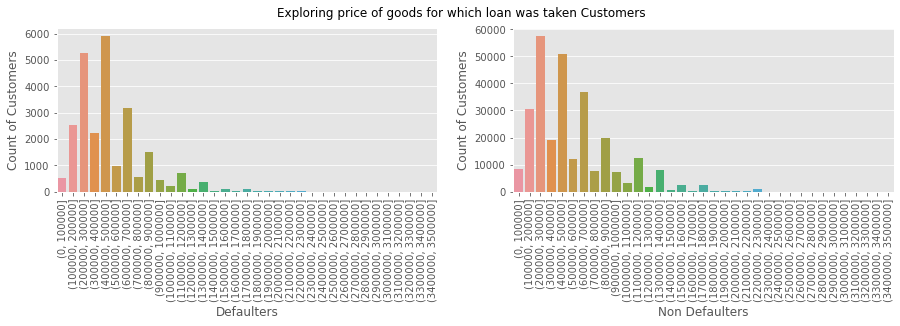

In [92]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.goods_price_bin) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.goods_price_bin) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring price of goods for which loan was taken Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
The price of the goods for which maximum defaulters had taken a loan is between 4 Lakhs to 5Lakhs. While non defaulters amount is around 2Lakhs to 3Lakhs

##### CNT_CHILDREN            

In [93]:
has_defaulters_df.CNT_CHILDREN.describe()

count    24825.000000
mean         0.463807
std          0.756903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64

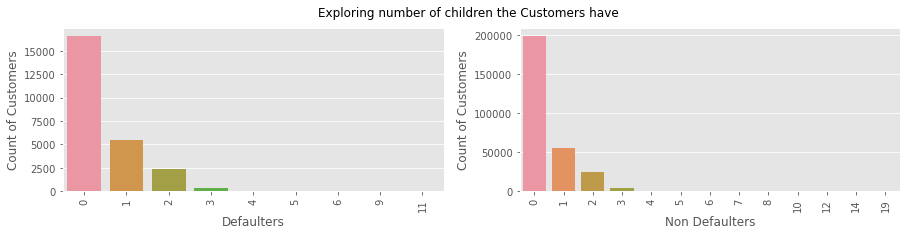

In [94]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.CNT_CHILDREN) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.CNT_CHILDREN) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring number of children the Customers have')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
There is no significant pattern here that stands out for the defaulters.

##### CNT_FAM_MEMBERS            

In [95]:
has_defaulters_df.CNT_FAM_MEMBERS.describe()

count    24825.000000
mean         2.181269
std          0.951327
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64

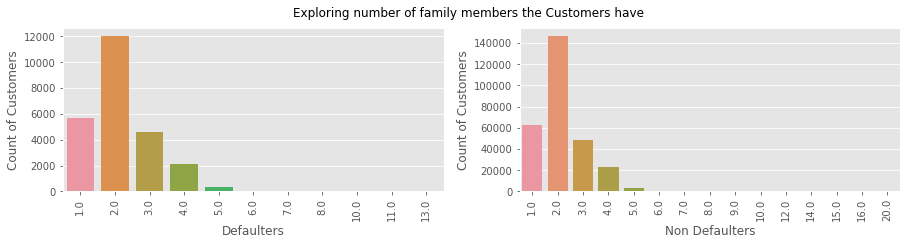

In [96]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.CNT_FAM_MEMBERS) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.CNT_FAM_MEMBERS) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring number of family members the Customers have')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
There is no significant pattern here that stands out for the defaulters.

##### DAYS_REGISTRATION

The column DAYS_REGISTRATION was converted to years and is stored in the Years_REGISTRATION. This will be used for anlysis.

In [97]:
has_defaulters_df.Years_REGISTRATION.describe()

count    24825.000000
mean        11.802256
std          9.033503
min          0.000000
25%          4.000000
50%         11.000000
75%         18.000000
max         62.000000
Name: Years_REGISTRATION, dtype: float64

In [98]:
bins = np.arange(0,80,10)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [99]:
has_defaulters_df['years_reg_bin']=pd.cut(has_defaulters_df['Years_REGISTRATION'],bins=bins)
non_defaulters_df['years_reg_bin']=pd.cut(non_defaulters_df['Years_REGISTRATION'],bins=bins)

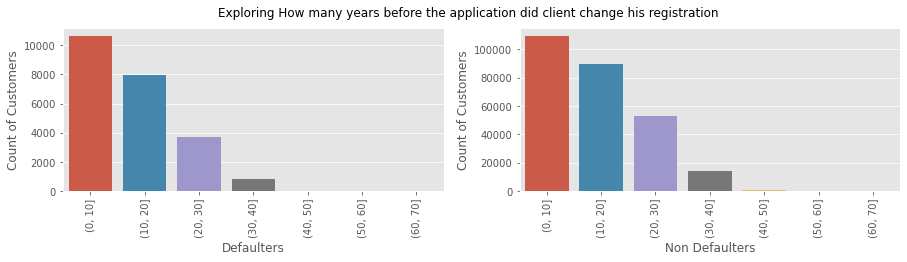

In [100]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.years_reg_bin) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.years_reg_bin) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring How many years before the application did client change his registration')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
No distinguishing pattern is seen in defaulters for how many years before the application did client change his registration.

##### DAYS_ID_PUBLISH

The column DAYS_ID_PUBLISH was converted to years and is stored in the Years_publish. This will be used for analysis.

In [101]:
has_defaulters_df.Years_publish.describe()

count    24825.000000
mean         7.000201
std          4.152774
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         17.000000
Name: Years_publish, dtype: float64

In [102]:
non_defaulters_df.Years_publish.describe()

count    282686.000000
mean          7.776112
std           4.127031
min           0.000000
25%           4.000000
50%           9.000000
75%          11.000000
max          19.000000
Name: Years_publish, dtype: float64

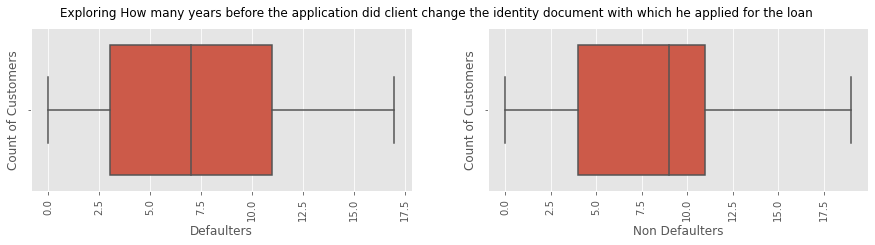

In [103]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.boxplot(data = has_defaulters_df, x= has_defaulters_df.Years_publish) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.boxplot(data = non_defaulters_df, x= non_defaulters_df.Years_publish) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring How many years before the application did client change the identity document with which he applied for the loan')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


plt.show()

######  Observation 
Defaulters have changed their identity with median value of around 7 years before the application whereas non-defaulters have a value of around 9 years

#### Corelation of univariate numerical variables

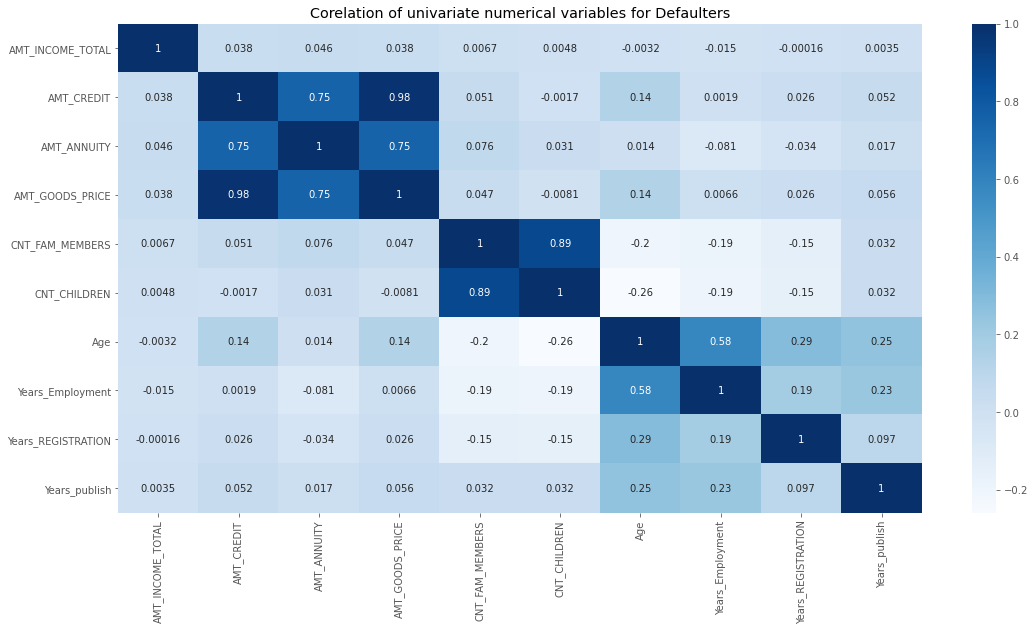

In [104]:
plt.figure(figsize=(18,9))

plt.title("Corelation of univariate numerical variables for Defaulters")
sns.heatmap(has_defaulters_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Age','Years_Employment','Years_REGISTRATION','Years_publish']].corr(),annot=True,cmap='Blues')

plt.show()

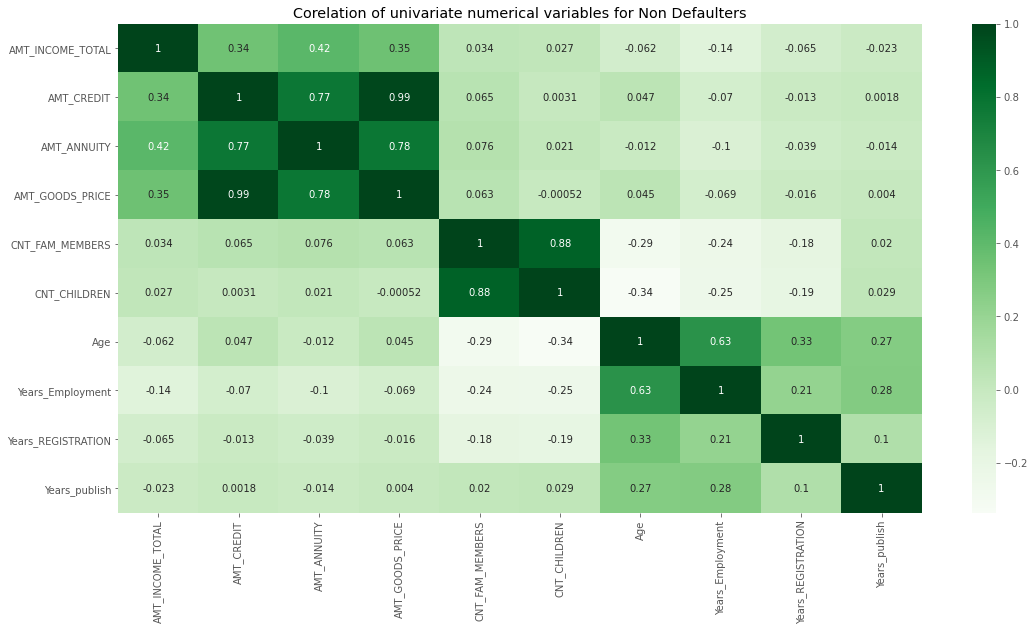

In [105]:
plt.figure(figsize=(18,9))
plt.title("Corelation of univariate numerical variables for Non Defaulters")
sns.heatmap(non_defaulters_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Age','Years_Employment','Years_REGISTRATION','Years_publish']].corr(),annot=True,cmap='Greens')
plt.show()

The columns amount income total, amount credit, amount annuity, amount goods price have high correlation meaning if anyone of these increase the other columns will also be increasing. That is if credit amount increases annuity will also increase. Age ,years of employment are moderately corelated which is saying that an older person need not have a higher years of experience.
There are some negatively corelated variables like age and count of children, meaning as people grow older they do not have dependent children. 

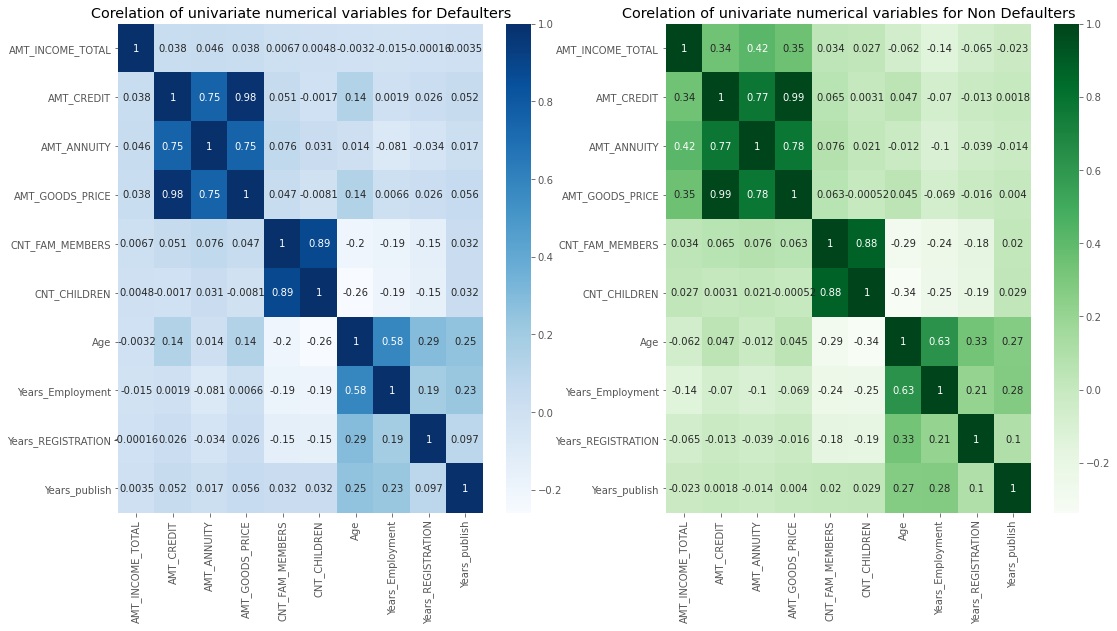

In [106]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.title("Corelation of univariate numerical variables for Defaulters")
sns.heatmap(has_defaulters_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Age','Years_Employment','Years_REGISTRATION','Years_publish']].corr(),annot=True,cmap='Blues')
plt.subplot(1,2,2)
plt.title("Corelation of univariate numerical variables for Non Defaulters")
sns.heatmap(non_defaulters_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','Age','Years_Employment','Years_REGISTRATION','Years_publish']].corr(),annot=True,cmap='Greens')
plt.show()

###### Observation
Both the data frames have similar corelation for the variables. The age has very low correlation with count of children and family members hence can be ignored from the analysis. Amount of income, credit, goods price and annuity are highly correlated hence will be looked into in detail in the following sections.

### Bivariate Analysis

#####  Bivariate categorical vs categorical

##### NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS

In [107]:
has_defaulters_df['edu_family'] =has_defaulters_df.NAME_EDUCATION_TYPE+has_defaulters_df.NAME_FAMILY_STATUS
non_defaulters_df['edu_family'] =non_defaulters_df.NAME_EDUCATION_TYPE+non_defaulters_df.NAME_FAMILY_STATUS

[Text(0.5, 0, 'Non Defaulters')]

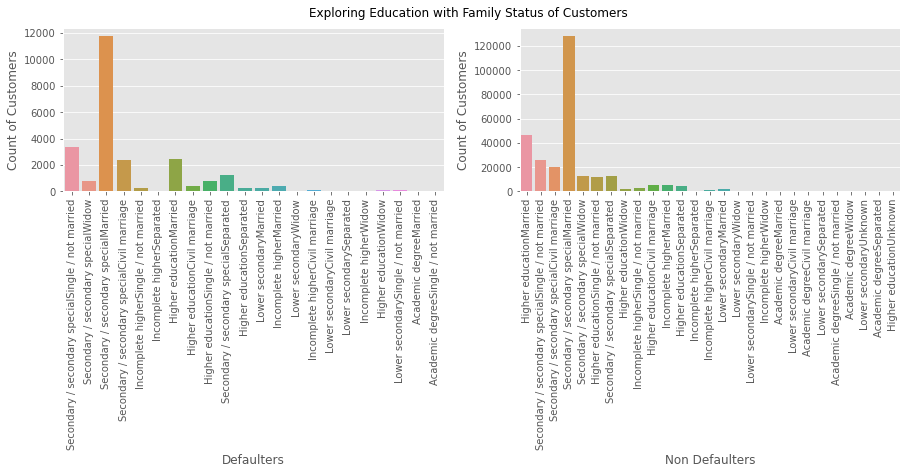

In [108]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.edu_family) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.edu_family) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring Education with Family Status of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Higher Education married is relatively more in the defaulters group.

##### CODE_GENDER vs NAME_FAMILY_STATUS

In [109]:
has_defaulters_df['gen_family'] =has_defaulters_df.CODE_GENDER+has_defaulters_df.NAME_FAMILY_STATUS
non_defaulters_df['gen_family'] =non_defaulters_df.CODE_GENDER+non_defaulters_df.NAME_FAMILY_STATUS

[Text(0.5, 0, 'Non Defaulters')]

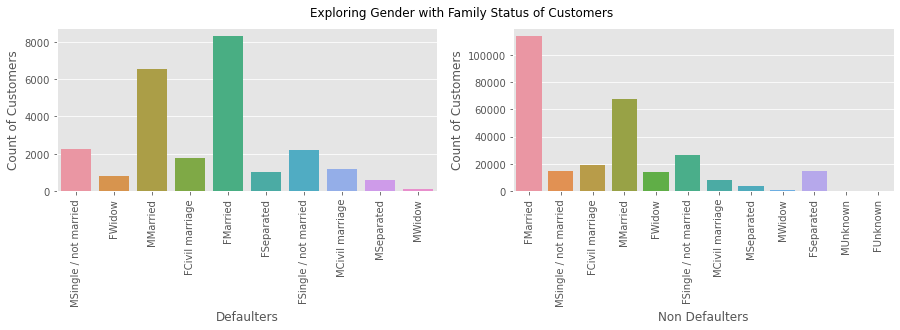

In [110]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.gen_family) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.gen_family) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring Gender with Family Status of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Male Married category is more prominent in the defaulters group.


##### CONTRACT_TYPE vs CODE_GENDER

In [111]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_CONTRACT_TYPE+has_defaulters_df.CODE_GENDER
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_CONTRACT_TYPE+non_defaulters_df.CODE_GENDER

[Text(0.5, 0, 'Non Defaulters')]

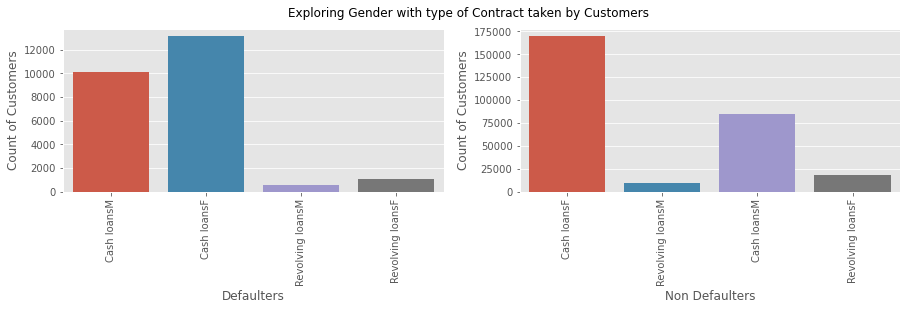

In [112]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring Gender with type of Contract taken by Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Cash Loan by Males are more in the defaulters group compared to non-defaulters.

##### NAME_INCOME_TYPE vs CODE_GENDER

In [113]:
has_defaulters_df['con_inc'] =has_defaulters_df.NAME_INCOME_TYPE+has_defaulters_df.CODE_GENDER
non_defaulters_df['con_inc'] =non_defaulters_df.NAME_INCOME_TYPE+non_defaulters_df.CODE_GENDER

[Text(0.5, 0, 'Non Defaulters')]

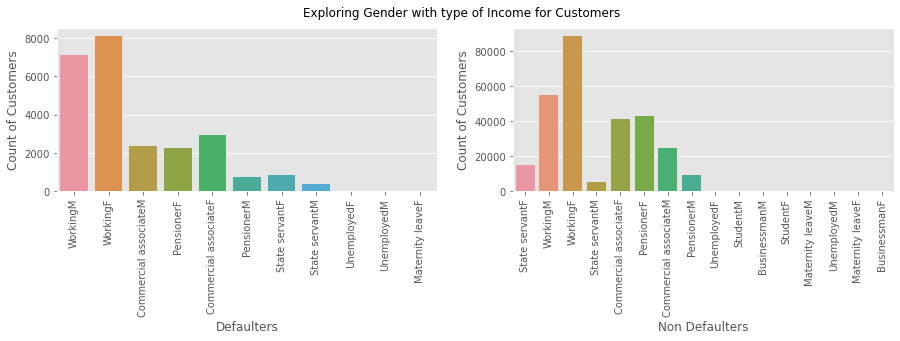

In [114]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_inc) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_inc) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring Gender with type of Income for Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Working male category is more in the dafaulters group, pensioner females are more in te non-defaulters group compared to the defaulters group.

##### NAME_INCOME_TYPE vs NAME_EDUCATION_TYPE

In [115]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_INCOME_TYPE+has_defaulters_df.NAME_EDUCATION_TYPE
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_INCOME_TYPE+non_defaulters_df.NAME_EDUCATION_TYPE

[Text(0.5, 0, 'Non Defaulters')]

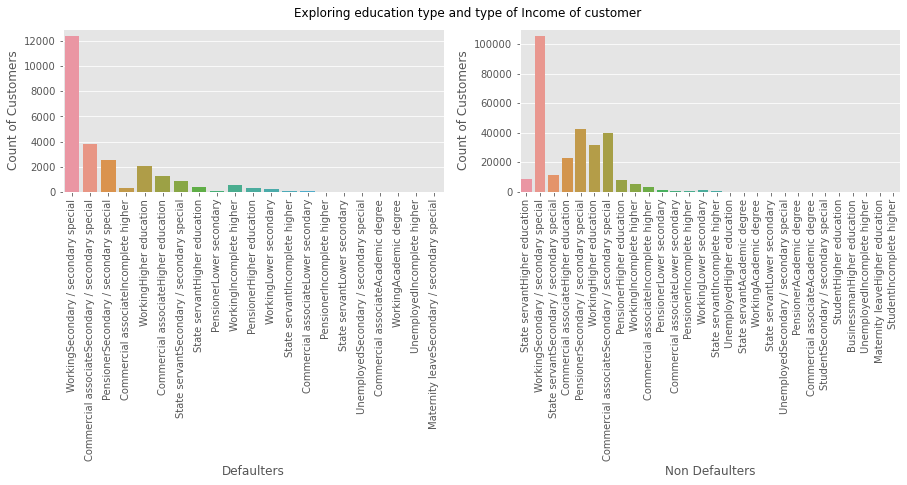

In [116]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring education type and type of Income of customer')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Working class with secondary education are the largest customer segment.Besides them Commercial associates with secondary education are among the next highest defaulters.

##### NAME_INCOME_TYPE vs NAME_FAMILY_STATUS

In [117]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_INCOME_TYPE+has_defaulters_df.NAME_FAMILY_STATUS
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_INCOME_TYPE+non_defaulters_df.NAME_FAMILY_STATUS

[Text(0.5, 0, 'Non Defaulters')]

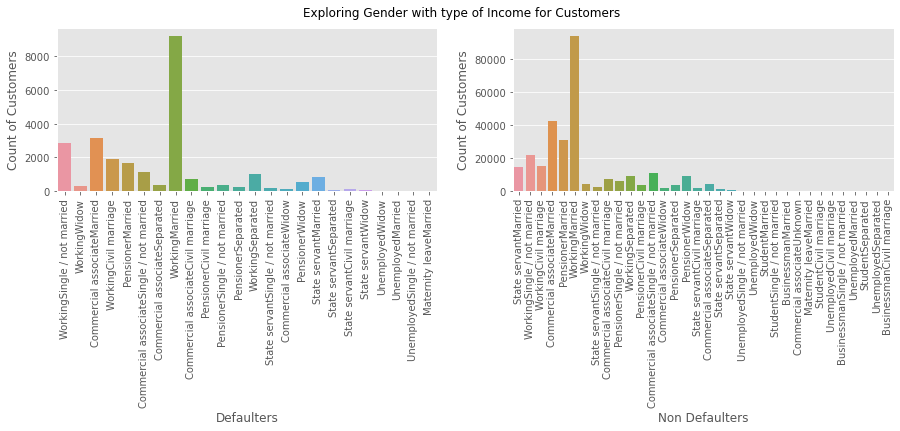

In [118]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring Gender with type of Income for Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Not a very clear distinction for the defaulters group.

##### NAME_INCOME_TYPE vs NAME_CONTRACT_TYPE

In [119]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_INCOME_TYPE+'_'+has_defaulters_df.NAME_CONTRACT_TYPE
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_INCOME_TYPE+'_'+non_defaulters_df.NAME_CONTRACT_TYPE

[Text(0.5, 0, 'Non Defaulters')]

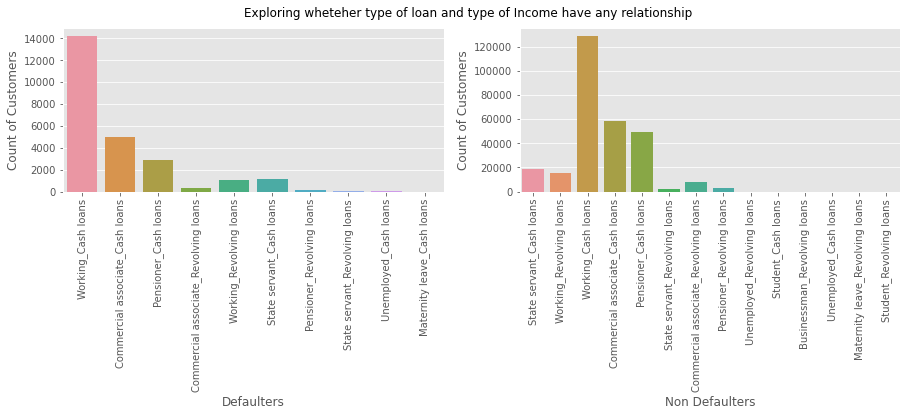

In [120]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring wheteher type of loan and type of Income have any relationship')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Working class take the most cash loans. Commercial associate with cash loans are present in  non_defaulters more than non-defaulters.

##### NAME_EDUCATION_TYPE vs NAME_CONTRACT_TYPE

In [121]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_EDUCATION_TYPE+'_'+has_defaulters_df.NAME_CONTRACT_TYPE
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_EDUCATION_TYPE+'_'+non_defaulters_df.NAME_CONTRACT_TYPE

[Text(0.5, 0, 'Non Defaulters')]

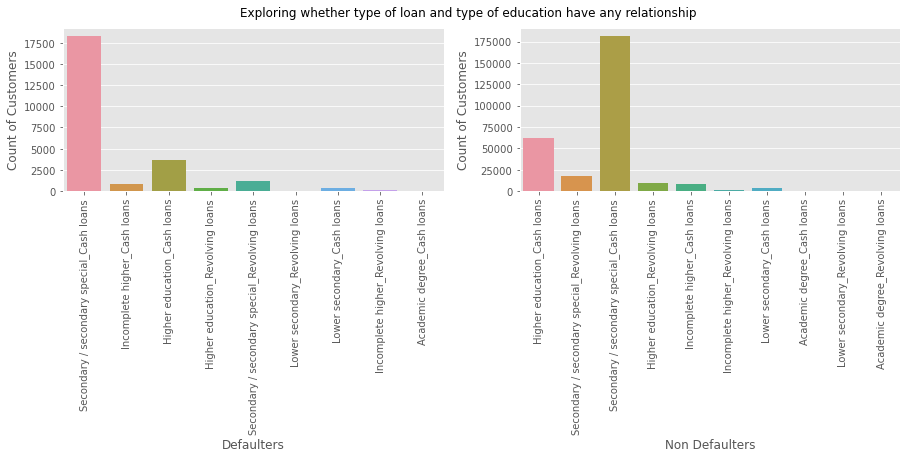

In [122]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring whether type of loan and type of education have any relationship')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')


###### Observation
Customers who have Higher Education and have taken Cash loans are more in non defaulters group than defaulters.

##### NAME_EDUCATION_TYPE vs CODE_GENDER

In [123]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_EDUCATION_TYPE+'_'+has_defaulters_df.CODE_GENDER
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_EDUCATION_TYPE+'_'+non_defaulters_df.CODE_GENDER

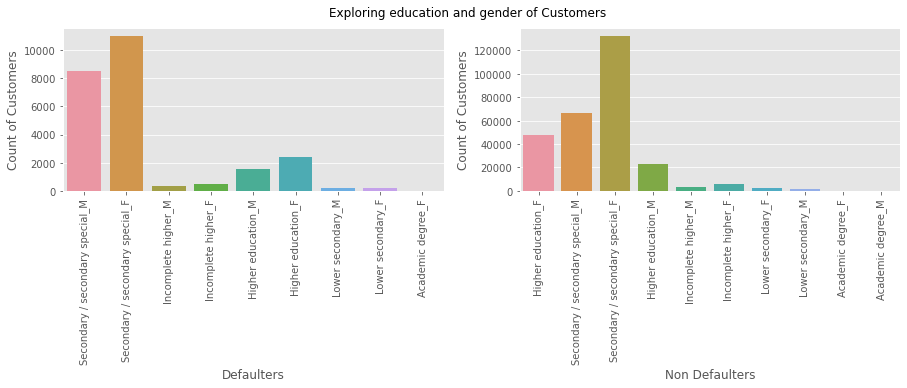

In [124]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring education and gender of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
plt.show();

###### Observation
Customers who are male and have a secondary education are high in defaulters list.The female customers with secondary education are high in both defaulters and non defaulters.

##### NAME_HOUSING_TYPE vs NAME_CONTRACT_TYPE

In [125]:
has_defaulters_df['con_gen'] =has_defaulters_df.NAME_HOUSING_TYPE+'_'+has_defaulters_df.NAME_CONTRACT_TYPE
non_defaulters_df['con_gen'] =non_defaulters_df.NAME_HOUSING_TYPE+'_'+non_defaulters_df.NAME_CONTRACT_TYPE

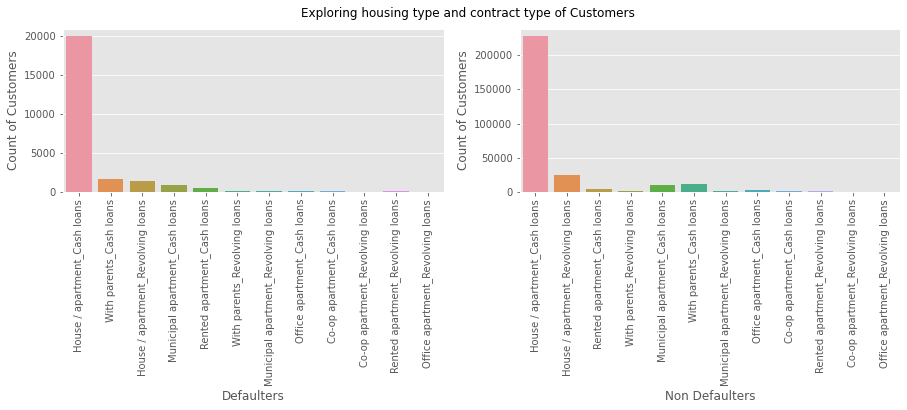

In [126]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.countplot(data = has_defaulters_df, x= has_defaulters_df.con_gen) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.countplot(data = non_defaulters_df, x= non_defaulters_df.con_gen) 
ax2.set(ylabel='Count of Customers')
fig.suptitle('Exploring housing type and contract type of Customers')
ax1.set(ylabel='Count of Customers')
ax1.set(xlabel='Defaulters')
ax2.set(xlabel='Non Defaulters')
plt.show();

###### Observation
Most of the customers who have taken cash loans own an apartment or house.

#### Bivariate analysis for continous vs continuous variables

##### AMT_INCOME_TOTAL vs AMT_CREDIT

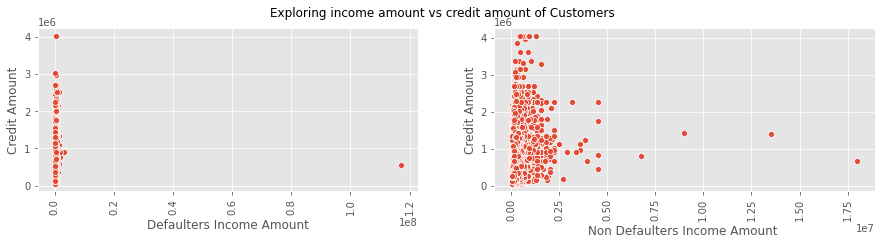

In [127]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_INCOME_TOTAL, y=has_defaulters_df.AMT_CREDIT) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_INCOME_TOTAL, y= non_defaulters_df.AMT_CREDIT) 
ax2.set(ylabel='Credit Amount')
fig.suptitle('Exploring income amount vs credit amount of Customers')
ax1.set(ylabel='Credit Amount')
ax1.set(xlabel='Defaulters Income Amount')
ax2.set(xlabel='Non Defaulters Income Amount ')
plt.show();

###### Observation
Credit amount is high for deafulters though the income amount is in the lower range. Non of the defaulters have a high income amount except for an outlier.

##### AMT_INCOME_TOTAL vs AMT_ANNUITY

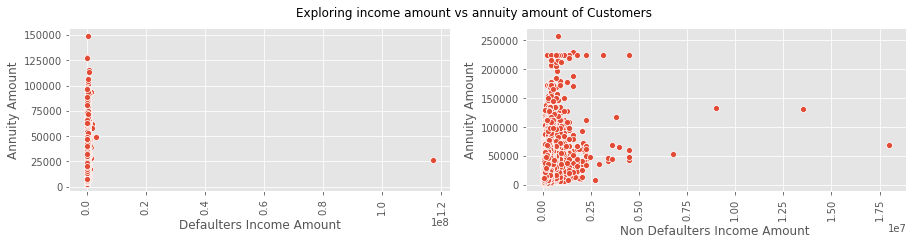

In [128]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_INCOME_TOTAL, y=has_defaulters_df.AMT_ANNUITY) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_INCOME_TOTAL, y= non_defaulters_df.AMT_ANNUITY) 
ax2.set(ylabel='Annuity Amount')
fig.suptitle('Exploring income amount vs annuity amount of Customers')
ax1.set(ylabel='Annuity Amount')
ax1.set(xlabel='Defaulters Income Amount')
ax2.set(xlabel='Non Defaulters Income Amount ')
plt.show();

###### Observation
Annuity amount is high for deafulters though the income amount is in the lower range.Hence it may be difficult to repay with lower income and high annuity. None of the defaulters have a high income amount except for an outlier.

##### AMT_INCOME_TOTAL vs AMT_GOODS_PRICE

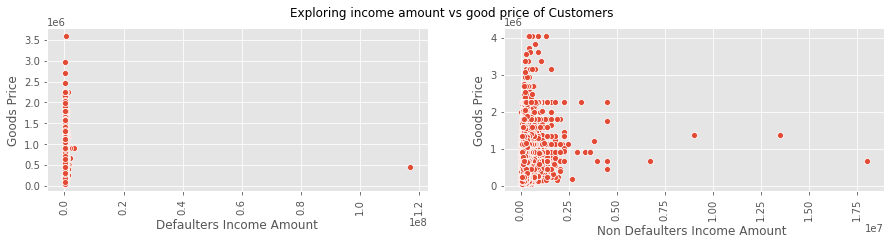

In [129]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_INCOME_TOTAL, y=has_defaulters_df.AMT_GOODS_PRICE) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_INCOME_TOTAL, y= non_defaulters_df.AMT_GOODS_PRICE) 
ax2.set(ylabel='Goods Price')
fig.suptitle('Exploring income amount vs good price of Customers')
ax1.set(ylabel='Goods Price')
ax1.set(xlabel='Defaulters Income Amount')
ax2.set(xlabel='Non Defaulters Income Amount ')
plt.show();

###### Observation
Goods Price is high for deafulters though the income amount is in the lower range.Hence it may be difficult to repay with lower income and high annuity because of the high goods Price. None of the defaulters have a high income amount except for an outlier.

##### AMT_GOODS_PRICE vs AMT_CREDIT

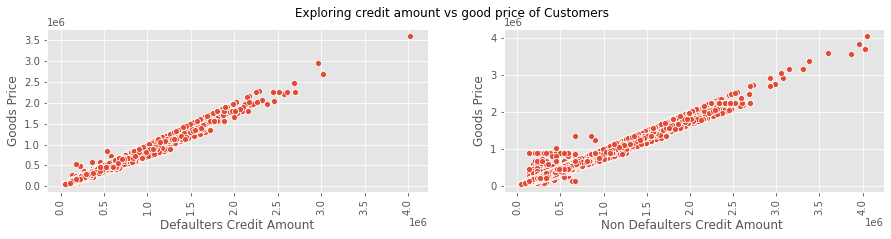

In [130]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_CREDIT, y=has_defaulters_df.AMT_GOODS_PRICE) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_CREDIT, y= non_defaulters_df.AMT_GOODS_PRICE) 
ax2.set(ylabel='Goods Price')
fig.suptitle('Exploring credit amount vs good price of Customers')
ax1.set(ylabel='Goods Price')
ax1.set(xlabel='Defaulters Credit Amount')
ax2.set(xlabel='Non Defaulters Credit Amount ')
plt.show();

###### Observation
Credit amount and Goods price have a linear realtion. This is expected since the loan credit amount is based on the goods price. In non defaulters the goods price is higher than the expected credit amount, hence we can say non defaulters borrow money less than the goods price rquired asssuring that they can repay. 

##### AMT_ANNUITY  vs AMT_CREDIT

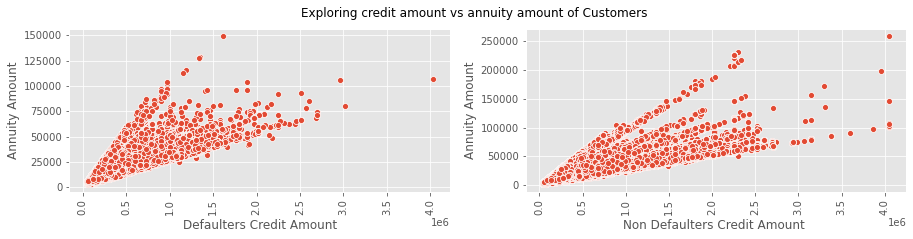

In [131]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_CREDIT, y=has_defaulters_df.AMT_ANNUITY) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_CREDIT, y= non_defaulters_df.AMT_ANNUITY) 
ax2.set(ylabel='Annuity Amount')
fig.suptitle('Exploring credit amount vs annuity amount of Customers')
ax1.set(ylabel='Annuity Amount')
ax1.set(xlabel='Defaulters Credit Amount')
ax2.set(xlabel='Non Defaulters Credit Amount ')
plt.show();

###### Observation
Credit amount and Annuity amount have a linear realtion. This is expected since the annuity amount is based on the credit amount given. The slope of the defaulters graph is higher than non defaulters grapgh. This shows that the non defaulters have a higher annuity for the same credit amout as that of the non defaulter.

##### Age  vs Years_REGISTRATION

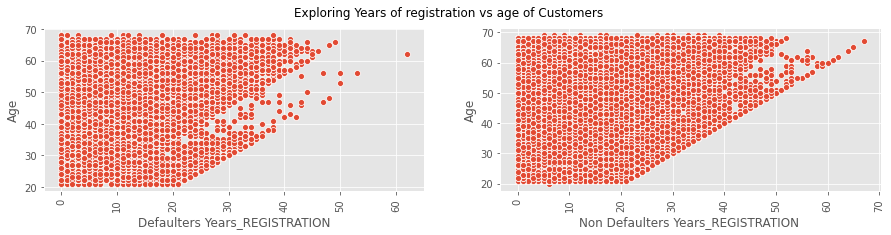

In [132]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.Years_REGISTRATION, y=has_defaulters_df.Age) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.Years_REGISTRATION, y= non_defaulters_df.Age) 
ax2.set(ylabel='Age')
fig.suptitle('Exploring Years of registration vs age of Customers')
ax1.set(ylabel='Age')
ax1.set(xlabel='Defaulters Years_REGISTRATION')
ax2.set(xlabel='Non Defaulters Years_REGISTRATION ')
plt.show();

###### Observation
There is a relation ship with the years of registration and age. It seems to be linear afte 20 years of registration. There are fewer defaulters after 30 years of registration.

##### Age  vs AMT_INCOME_TOTAL

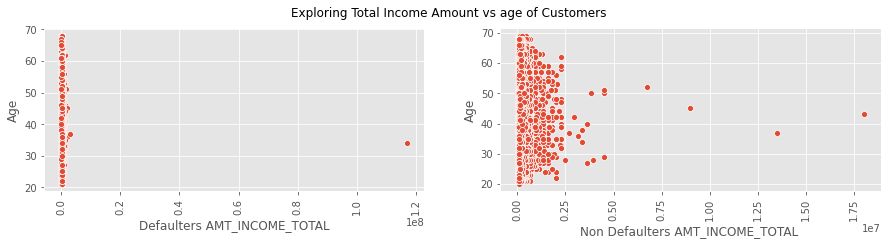

In [133]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_INCOME_TOTAL, y=has_defaulters_df.Age) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_INCOME_TOTAL, y= non_defaulters_df.Age) 
ax2.set(ylabel='Age')
fig.suptitle('Exploring Total Income Amount vs age of Customers')
ax1.set(ylabel='Age')
ax1.set(xlabel='Defaulters AMT_INCOME_TOTAL')
ax2.set(xlabel='Non Defaulters AMT_INCOME_TOTAL ')
plt.show();

###### Observation
The defaulters have lower salary compared to non defaulters except for an outlier.

##### Employment Years  vs AMT_INCOME_TOTAL

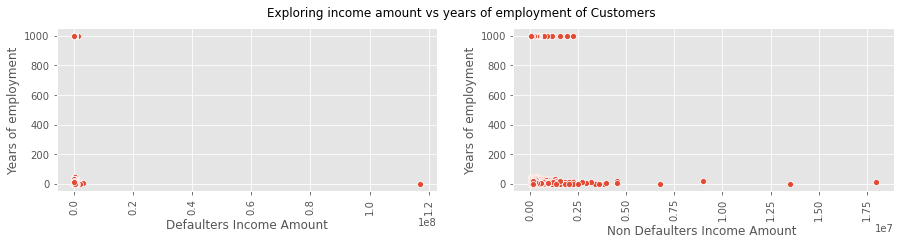

In [134]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_INCOME_TOTAL, y=has_defaulters_df.Years_Employment) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_INCOME_TOTAL, y= non_defaulters_df.Years_Employment) 
ax2.set(ylabel='Years of employment')
fig.suptitle('Exploring income amount vs years of employment of Customers')
ax1.set(ylabel='Years of employment')
ax1.set(xlabel='Defaulters Income Amount')
ax2.set(xlabel='Non Defaulters Income Amount ')
plt.show();

###### Observation
Income amount is lower for all groups of years of emplyment of the defaulters except for the outliers. Hence income amount plays an important role in giving out loans irrespective of the years of employment

#####  Years of Registration  vs AMT_CREDIT

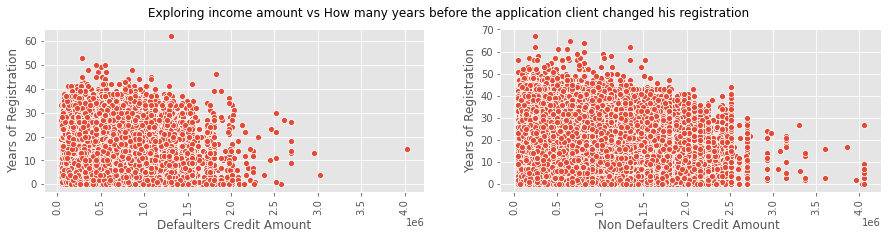

In [135]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_CREDIT, y=has_defaulters_df.Years_REGISTRATION) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_CREDIT, y= non_defaulters_df.Years_REGISTRATION) 
ax2.set(ylabel='Years of Registration')
fig.suptitle('Exploring income amount vs How many years before the application client changed his registration')
ax1.set(ylabel='Years of Registration')
ax1.set(xlabel='Defaulters Credit Amount')
ax2.set(xlabel='Non Defaulters Credit Amount ')
plt.show();

###### Observation
There is no clear relationship between the credit amount and days of registration for either of the defaulters or non defaulters group. Hence a change in registration will not raise any flags.

#####  Years Publish  vs AMT_CREDIT

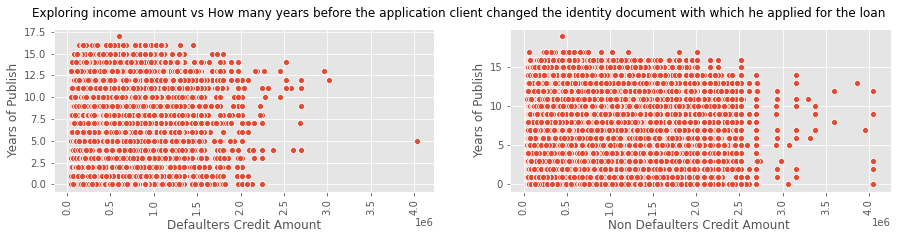

In [136]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.AMT_CREDIT, y=has_defaulters_df.Years_publish) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.AMT_CREDIT, y= non_defaulters_df.Years_publish) 
ax2.set(ylabel='Years of Publish')
fig.suptitle('Exploring income amount vs How many years before the application client changed the identity document with which he applied for the loan')
ax1.set(ylabel='Years of Publish')
ax1.set(xlabel='Defaulters Credit Amount')
ax2.set(xlabel='Non Defaulters Credit Amount ')
plt.show();

###### Observation
There is no clear relationship between the credit amount and years of publish for either of the defaulters or non defaulters group. Hence a change in registration will not raise any flags.

#####  Years_Employment  vs Age

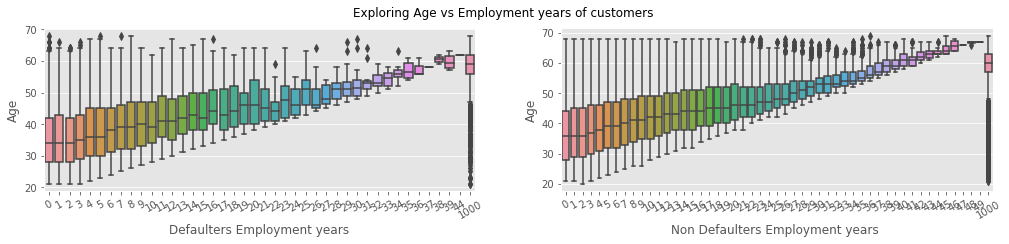

In [137]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(17,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=30)
ax1 = sns.boxplot(data = has_defaulters_df, x= has_defaulters_df.Years_Employment, y=has_defaulters_df.Age) 

plt.subplot(1,2,2)
plt.xticks(rotation=30)
ax2 = sns.boxplot(data = non_defaulters_df, x= non_defaulters_df.Years_Employment, y= non_defaulters_df.Age) 
ax2.set(ylabel='Age')
fig.suptitle('Exploring Age vs Employment years of customers')
ax1.set(ylabel='Age')
ax1.set(xlabel='Defaulters Employment years')
ax2.set(xlabel='Non Defaulters Employment years ')
plt.show();

###### Observation
The age and employment years medians are linearly realted. The people with less than 10 years of employment are in the age group of 20 to 40 .

#### Bivariate Analysis of continous vs categorical variables


#####  NAME_INCOME_TYPE  vs AMT_INCOME_TOTAL

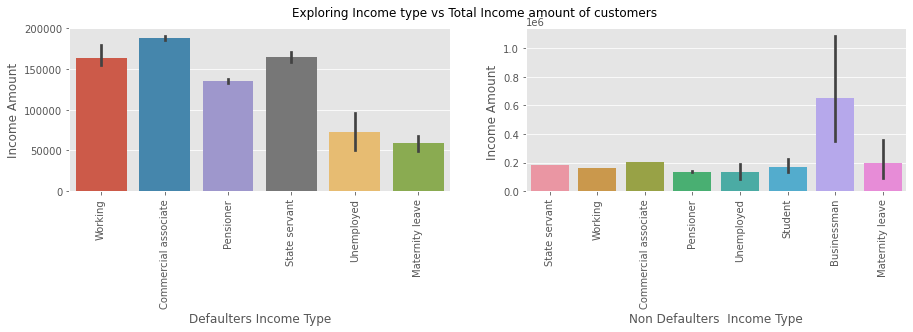

In [138]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_INCOME_TYPE, y=has_defaulters_df.AMT_INCOME_TOTAL) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_INCOME_TYPE, y= non_defaulters_df.AMT_INCOME_TOTAL) 
ax2.set(ylabel='Income Amount ')
fig.suptitle('Exploring Income type vs Total Income amount of customers')
ax1.set(ylabel='Income Amount')
ax1.set(xlabel='Defaulters Income Type')
ax2.set(xlabel='Non Defaulters  Income Type')
plt.show();

###### Observation
The income types working, commercial associate, pensioner, state servant,unemployed or maternity leave are among the defaulters.

#####  NAME_FAMILY_STATUS  vs AMT_INCOME_TOTAL

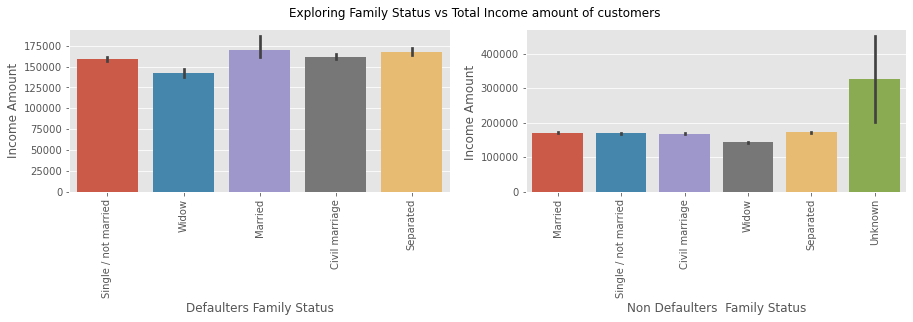

In [139]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_FAMILY_STATUS, y=has_defaulters_df.AMT_INCOME_TOTAL) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_FAMILY_STATUS, y= non_defaulters_df.AMT_INCOME_TOTAL) 
ax2.set(ylabel='Income Amount ')
fig.suptitle('Exploring Family Status vs Total Income amount of customers')
ax1.set(ylabel='Income Amount')
ax1.set(xlabel='Defaulters Family Status')
ax2.set(xlabel='Non Defaulters  Family Status')
plt.show();

###### Observation
Unkown family status feature high in non defaulters list. The other categories of family status show a similar pattern both in defaulters and non defaulters group.

#####  NAME_EDUCATION_TYPE  vs AMT_INCOME_TOTAL

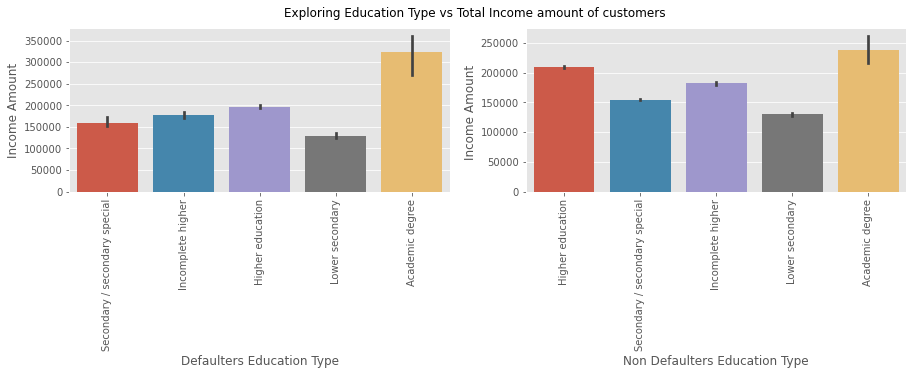

In [140]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_EDUCATION_TYPE, y=has_defaulters_df.AMT_INCOME_TOTAL) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_EDUCATION_TYPE, y= non_defaulters_df.AMT_INCOME_TOTAL) 
ax2.set(ylabel='Income Amount ')
fig.suptitle('Exploring Education Type vs Total Income amount of customers')
ax1.set(ylabel='Income Amount')
ax1.set(xlabel='Defaulters Education Type')
ax2.set(xlabel='Non Defaulters Education Type')
plt.show();

###### Observation
There is no pattern that distinguishes the defaulters from the non defaulters.

#####  NAME_CONTRACT_TYPE  vs AMT_INCOME_TOTAL

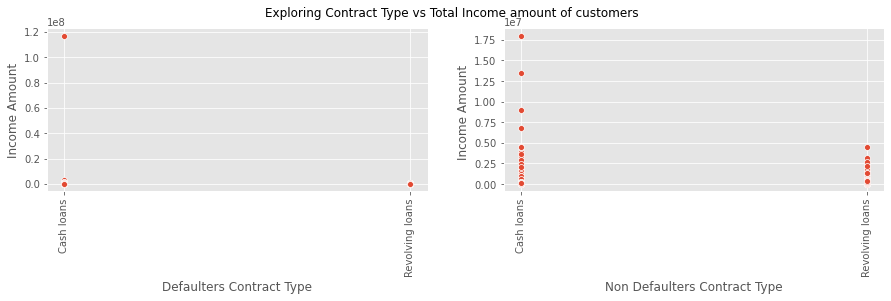

In [141]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.scatterplot(data = has_defaulters_df, x= has_defaulters_df.NAME_CONTRACT_TYPE, y=has_defaulters_df.AMT_INCOME_TOTAL) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.scatterplot(data = non_defaulters_df, x= non_defaulters_df.NAME_CONTRACT_TYPE, y= non_defaulters_df.AMT_INCOME_TOTAL) 
ax2.set(ylabel='Income Amount ')
fig.suptitle('Exploring Contract Type vs Total Income amount of customers')
ax1.set(ylabel='Income Amount')
ax1.set(xlabel='Defaulters Contract Type')
ax2.set(xlabel='Non Defaulters Contract Type')
plt.show();

###### Observation
Income amount is lower for the defaulters group irrespective of the loan type. Revolving loans are less in the group of defaulters compared to non defaulters.

#####  NAME_HOUSING_TYPE  vs AMT_GOODS_PRICE

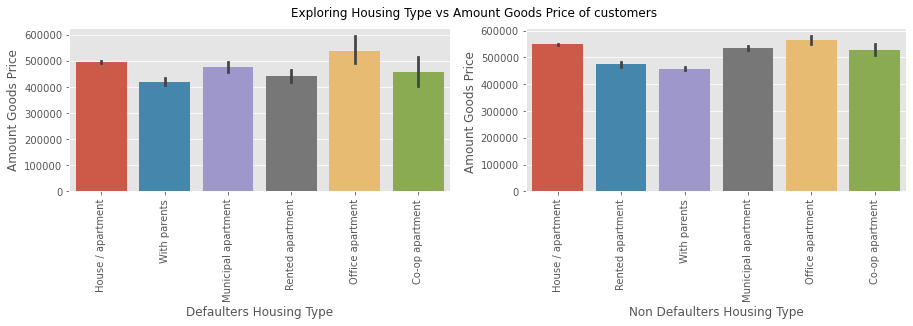

In [142]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_HOUSING_TYPE, y=has_defaulters_df.AMT_GOODS_PRICE) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_HOUSING_TYPE, y= non_defaulters_df.AMT_GOODS_PRICE) 
ax2.set(ylabel='Amount Goods Price ')
fig.suptitle('Exploring Housing Type vs Amount Goods Price of customers')
ax1.set(ylabel='Amount Goods Price')
ax1.set(xlabel='Defaulters Housing Type')
ax2.set(xlabel='Non Defaulters Housing Type')
plt.show();

###### Observation
The Goods Price for the defaulter group irrespective of the housing type is between 4 Lak to 5 Lakh except for the office apartment wheras for no defaulters it is between 5Lakh to 6 Lakh for most of them.

#####  NAME_FAMILY_STATUS  vs AMT_CREDIT

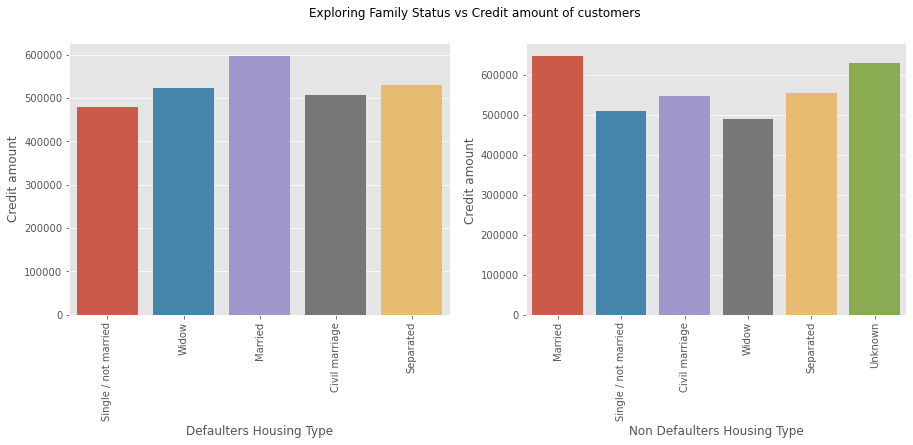

In [143]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_FAMILY_STATUS, y=has_defaulters_df.AMT_CREDIT,ci=0) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_FAMILY_STATUS, y= non_defaulters_df.AMT_CREDIT,ci=0) 
ax2.set(ylabel='Credit amount ')
fig.suptitle('Exploring Family Status vs Credit amount of customers')
ax1.set(ylabel='Credit amount')
ax1.set(xlabel='Defaulters Housing Type')
ax2.set(xlabel='Non Defaulters Housing Type')
plt.show();

###### Observation
Married people are among the top defaulters. This may also be because the nuber of married applicants are more. Unknown family status are high in the non defaulters group.

#####  NAME_INCOME_TYPE  vs AMT_CREDIT

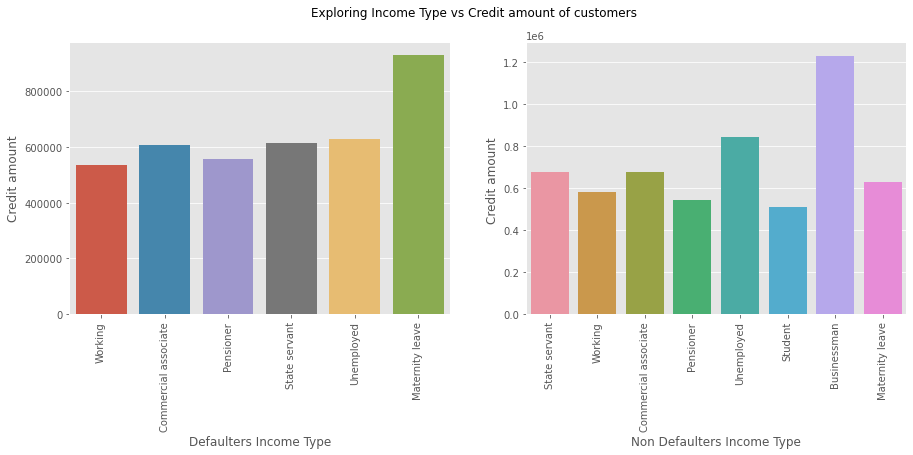

In [144]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_INCOME_TYPE, y=has_defaulters_df.AMT_CREDIT,ci=0) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_INCOME_TYPE, y= non_defaulters_df.AMT_CREDIT,ci=0) 
ax2.set(ylabel='Credit amount ')
fig.suptitle('Exploring Income Type vs Credit amount of customers')
ax1.set(ylabel='Credit amount')
ax1.set(xlabel='Defaulters Income Type')
ax2.set(xlabel='Non Defaulters Income Type')
plt.show();

###### Observation
People with Maternity Leave and a credit amount of more than 8 lakhs tend to be defaulters. Businessman and student dont feature in the defaulters list. 

#####  NAME_INCOME_TYPE  vs CNT_FAM_MEMBERS

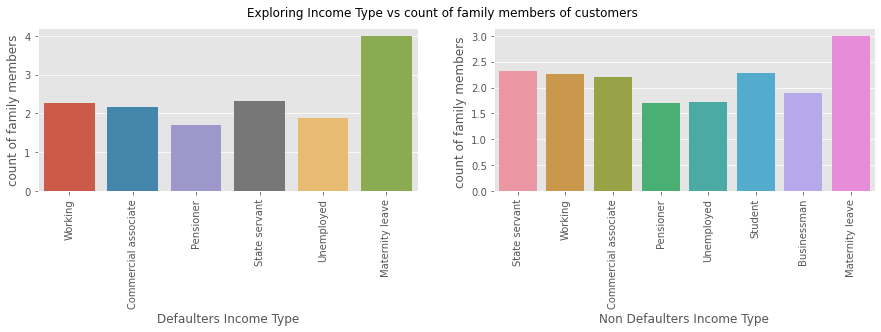

In [145]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_INCOME_TYPE, y=has_defaulters_df.CNT_FAM_MEMBERS,ci=0) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_INCOME_TYPE, y= non_defaulters_df.CNT_FAM_MEMBERS,ci=0) 
ax2.set(ylabel='count of family members ')
fig.suptitle('Exploring Income Type vs count of family members of customers')
ax1.set(ylabel='count of family members')
ax1.set(xlabel='Defaulters Income Type')
ax2.set(xlabel='Non Defaulters Income Type')
plt.show();

###### Observation
People with Maternity Leave and family size of 4 and above are featuring as defaulters. 

#####  NAME_EDUCATION_TYPE  vs CNT_FAM_MEMBERS

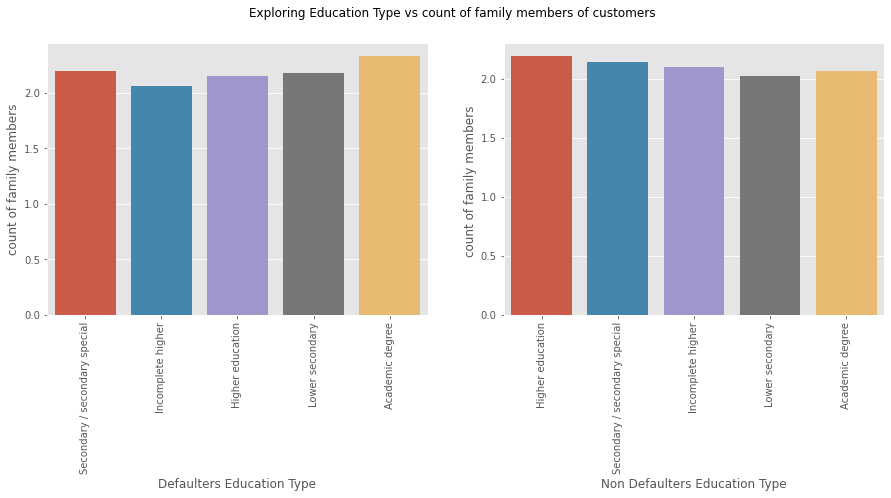

In [146]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), )
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax1 = sns.barplot(data = has_defaulters_df, x= has_defaulters_df.NAME_EDUCATION_TYPE, y=has_defaulters_df.CNT_FAM_MEMBERS,ci=0) 

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax2 = sns.barplot(data = non_defaulters_df, x= non_defaulters_df.NAME_EDUCATION_TYPE, y= non_defaulters_df.CNT_FAM_MEMBERS,ci=0) 
ax2.set(ylabel='count of family members ')
fig.suptitle('Exploring Education Type vs count of family members of customers')
ax1.set(ylabel='count of family members')
ax1.set(xlabel='Defaulters Education Type')
ax2.set(xlabel='Non Defaulters Education Type')
plt.show();

###### Observation
Academis degree with family size more than 2 are featuring as defaulters.

#####  Years_Employment  vs Gender

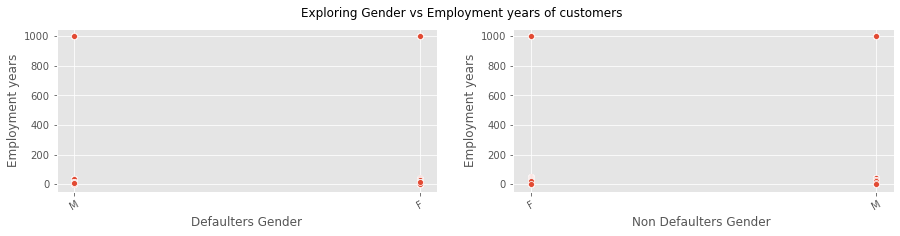

In [147]:
plt.style.use("ggplot")
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,3), )
plt.subplot(1,2,1)
plt.xticks(rotation=30)
ax1 = sns.scatterplot(data = has_defaulters_df, y= has_defaulters_df.Years_Employment, x=has_defaulters_df.CODE_GENDER) 

plt.subplot(1,2,2)
plt.xticks(rotation=30)
ax2 = sns.scatterplot(data = non_defaulters_df, y= non_defaulters_df.Years_Employment, x= non_defaulters_df.CODE_GENDER) 
ax2.set(ylabel='Employment years')
fig.suptitle('Exploring Gender vs Employment years of customers')
ax1.set(ylabel='Employment years')
ax1.set(xlabel='Defaulters Gender')
ax2.set(xlabel='Non Defaulters Gender ')
plt.show();

###### Observation
The gender and employment years don't have a very clear relation.

#### Data in Previous Application

In [148]:
#Reading the csv into the data frame 'previous_appl_df'
previous_appl_df = pd.read_csv("previous_application.csv")

In [149]:
previous_appl_df.shape

(1670214, 37)

In [150]:
previous_appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [151]:
#Trying to replace XNA with NA for the entire dataframe
previous_appl_df.replace('XNA',np.nan,inplace=True)

In [152]:
previous_appl_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE          677918
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON                5244
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE              1063666
CHANNEL_TYPE             

In [153]:
#number of columns
previous_appl_df.shape

(1670214, 37)

In [154]:
#Data frame for previous application of has a few applications which are redundant because of 
#multiple applications checking if they hae to be removed with the use of FLAG_LAST_APPL_PER_CONTRACT
previous_appl_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [155]:
#Data frame slice of previous application for defaulters of current application
prev_rec_of_curr_def = previous_appl_df[previous_appl_df.SK_ID_CURR.isin(has_defaulters_df.SK_ID_CURR)]


In [156]:
#Data frame for previous application of NON-defaulters of current application
prev_rec_of_curr_non_def = previous_appl_df[previous_appl_df.SK_ID_CURR.isin(non_defaulters_df.SK_ID_CURR)]

#####  NAME_YIELD_GROUP

In [157]:
prev_rec_of_curr_def.NAME_YIELD_GROUP.unique()

array(['high', nan, 'middle', 'low_normal', 'low_action'], dtype=object)

In [158]:
prev_rec_of_curr_non_def.NAME_YIELD_GROUP.value_counts()

middle        298833
high          276847
low_normal    255279
low_action     73517
Name: NAME_YIELD_GROUP, dtype: int64

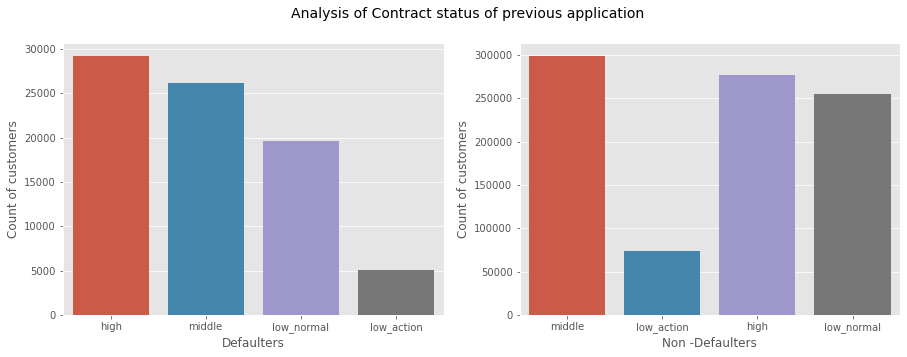

In [159]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_YIELD_GROUP', data=prev_rec_of_curr_def)
plt.suptitle('Analysis of Contract status of previous application', fontsize=14)
plt.xlabel('Defaulters')
plt.ylabel('Count of customers')
plt.subplot(1, 2, 2)
sns.countplot(x='NAME_YIELD_GROUP', data=prev_rec_of_curr_non_def)

plt.xlabel('Non -Defaulters')
plt.ylabel('Count of customers')
plt.show()

###### Observation
It shows most of the defaulters had a interest rate of high and middle while non-defaulters had a middle interest rate. Which means with high interest rate the annuity will also increase and makes it difficult to repay the loan. For non-defaulters the contract status is low action making it easy to repay the loan.

##### 11 NAME_GOODS_CATEGORY


In [160]:
prev_rec_of_curr_def.NAME_GOODS_CATEGORY.unique()

array([nan, 'Furniture', 'Mobile', 'Photo / Cinema Equipment',
       'Consumer Electronics', 'Computers', 'Construction Materials',
       'Audio/Video', 'Auto Accessories', 'Clothing and Accessories',
       'Vehicles', 'Office Appliances', 'Medicine', 'Gardening',
       'Sport and Leisure', 'Other', 'Medical Supplies', 'Direct Sales',
       'Jewelry', 'Tourism', 'Homewares', 'Insurance', 'Fitness',
       'Education', 'Additional Service', 'Weapon'], dtype=object)

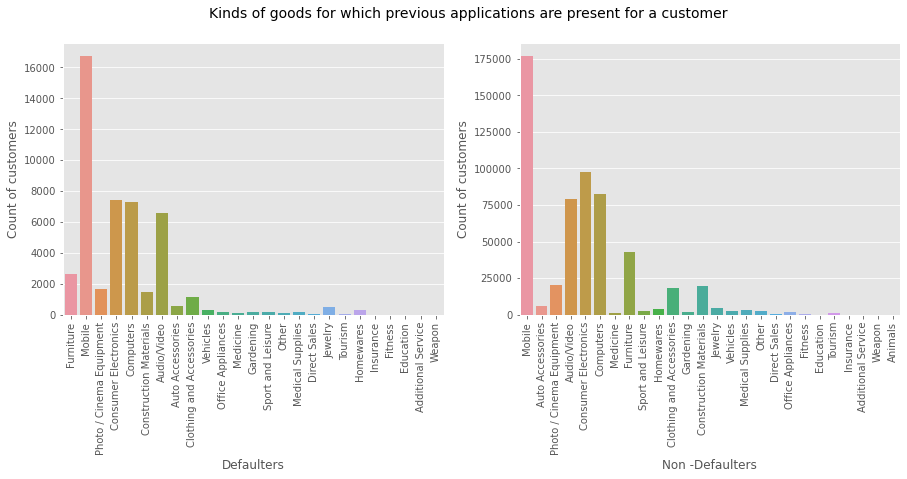

In [161]:
# #finding the What kind of goods did the client apply for in the previous application of the previous application and defaulters relation
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.countplot(x='NAME_GOODS_CATEGORY', data=prev_rec_of_curr_def)
plt.suptitle('Kinds of goods for which previous applications are present for a customer', fontsize=14)
plt.xlabel('Defaulters')
plt.ylabel('Count of customers')
plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.countplot(x='NAME_GOODS_CATEGORY', data=prev_rec_of_curr_non_def)

plt.xlabel('Non -Defaulters')
plt.ylabel('Count of customers')
plt.show()

######  Observation 
Mobile has been bought by maximum customers by taking a loan. For other goods there is no clear distinction for the loans taken.